
## Importação de bibliotecas, leitura e visualização do arquivo *csv*

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math as mt
from math import factorial
from scipy import stats as st

In [85]:
csv_path = os.path.join(os.getcwd(), 'games.csv')
df = pd.read_csv(csv_path)

In [86]:
title = 'Visualização do DataFrame original'
print('\n' + title.center(145))
display(df)
print()
df.info(show_counts=True)


                                                        Visualização do DataFrame original                                                       


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



## Contagem de valores ausentes

## Verificação do percentual de valores ausentes por coluna

In [87]:
print('\nQuantidade de valores ausentes por coluna:')
print(df.isna().sum().to_string(index=True))

print('\nPercentual de valores ausentes por coluna:')
print(((df.isna().sum() / len(df)) * 100).to_string(index=True, float_format='{:.2f}'.format))


Quantidade de valores ausentes por coluna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766

Percentual de valores ausentes por coluna:
Name               0.01
Platform           0.00
Year_of_Release    1.61
Genre              0.01
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score      51.32
User_Score        40.09
Rating            40.48



### Interpretações:
 
**Colunas com poucos ou nenhum valor ausente:**
 
   - Platform (0.00%): todas as linhas têm informação de plataforma
 
   - NA_sales, EU_sales, JP_sales, Other_sales (0.00%): todas as vendas estão registradas
 
   - Name (0.01%): quase todos os jogos têm nome (apenas ~0.01% sem nome)
 
   - Genre (0.01%): quase todos os jogos possuem gênero definido
 
**Colunas com valores ausentes moderados:**
 
   - Year_of_Release (1.60%): ~1.6% dos jogos não têm ano de lançamento
 
**Colunas com muitos valores ausentes:**
 
   - Critic_Score (51.31%): mais da metade dos jogos (~51%) não têm avaliação de críticos
 
   - User_Score (40.08%): ~40% não têm avaliação de usuários
 
   - Rating (40.47%): ~40% não têm classificação ESRB



## Conversão dos caracteres dos nomes das colunas para caracteres minúsculos

In [88]:
df_lower_case = df.copy()

df_lower_case.columns = df_lower_case.columns.str.lower()

title = 'Dataframe com colunas em letras minúsculas'
print('\n' + title.center(135))

display(df_lower_case)


                                               Dataframe com colunas em letras minúsculas                                              


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



## Contagem de dados duplicados

In [89]:
dupl_qnt = df_lower_case.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

print(f'\nQuantidade de valores duplicados encontrados: {dupl_qnt}')


Quantidade de valores duplicados encontrados: 2



## Identificação de dados duplicados

In [90]:
title = 'Visualização dos valores duplicados encontrados'
print('\n' + title.center(120))
display(df_lower_case[df_lower_case.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)].sort_values(by='name'))


                                    Visualização dos valores duplicados encontrados                                     


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



## Tratamento de dados duplicados

In [91]:
df_wo_dupl = df_lower_case.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').copy()

refreshed_dupl_qnt = df_wo_dupl.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

print(f'\nApós tratamento dos dados, a quantidade de valores duplicados é: {refreshed_dupl_qnt}')


Após tratamento dos dados, a quantidade de valores duplicados é: 0



*Ao realizar a contagem de duplicatas especifiquei colunas para trazer o resultado de duplicatas reais, uma vez que poderíamos ter jogos com mesmo nome em plataformas distintas, por exemplo.*

*Utilização de keep='first' em drop.duplicates() a fim de manter a primeira ocorrência da duplicata, tendo em vista ser a ocorrência com dados significativos nas duas situações.*


## Conversão de tipo de dados da coluna *year_of_release*

In [92]:
df_wo_dupl['year_of_release'] = df_wo_dupl['year_of_release'].astype('Int64')
print()
df_wo_dupl.info(show_counts=True)

title = 'Dataframe sem valores duplicados'
print('\n' + title.center(140))
display(df_wo_dupl)


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB

                                                      Dataframe sem valores duplicados                                                      


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



## Identificação e visualização de dados únicos da coluna *user_score*

In [93]:
title = 'Identificando os valores únicos:'
print('\n' + title.center(70))
print(df_wo_dupl['user_score'].unique())

nan_user_score = df_wo_dupl[df_wo_dupl['user_score'].isna()]
title = 'Visualização dos jogos com user_score ausente'
print()
print('\n' + title.center(140))
display(nan_user_score)


                   Identificando os valores únicos:                   
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


                                               Visualização dos jogos com user_score ausente                                                


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



## Conversão do tipo de dados da coluna *user_score* de *object* para *float* e valores não-numéricos para *NaN*

In [94]:
final_df = df_wo_dupl.copy()

final_df['user_score'] = pd.to_numeric(final_df['user_score'], errors='coerce')

print(f'\nApós conversão, o tipo de dados agora é: {final_df['user_score'].dtype}')

print(
    f'\nApós conversão dos valores \'tdb\' em NaN, '
    f'a quantidade de valores nulos que era de {df_wo_dupl['user_score'].isnull().sum()} '
    f'agora é de: {final_df['user_score'].isnull().sum()}')

print()
print()

print(final_df.info())


Após conversão, o tipo de dados agora é: float64

Após conversão dos valores 'tdb' em NaN, a quantidade de valores nulos que era de 6700 agora é de: 9124


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None



*Após conversão (errors='coerce' → converte números válidos para float e transforma valores não-numéricos em NaN), também foi feira verificação da assertividade com .info()*


### Observações gerais iniciais:
 
**Foram identificados:**
 
   - valores ausentes em quantidade significativa em 3 colunas (critic_score, user_score e rating) 
 
   - nomes das colunas com letras maiúsculas e minúsculas
 
   - situações isoladas de valores duplicados

**Pontos específicos:**
 
   - necessário converter a coluna year_of_release de float para int
 
   - manter as colunas de vendas em float para cálculos mais precisos

   - conversão do tipo de dados da coluna user_score de object para float
 
   - a coluna user_score também traz o dado 'tbd' (to be determined), será convertido em NaN



## Cálculo do total de vendas de cada jogo e criação de coluna com o resultado

In [95]:
final_df_sales = final_df.copy()

final_df_sales['global_sales'] = final_df_sales['na_sales'] + final_df_sales['eu_sales'] + final_df_sales['jp_sales'] + final_df_sales['other_sales']

title = 'Dataframe com a nova coluna de vendas globais'
print('\n' + title.center(145))
display(final_df_sales)


                                                  Dataframe com a nova coluna de vendas globais                                                  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01



*Criada a coluna global_sales com as vendas totais de cada jogo (soma das vendas em todas as regiões)*


## Visualização da quantidade de jogos lançados a cada ano

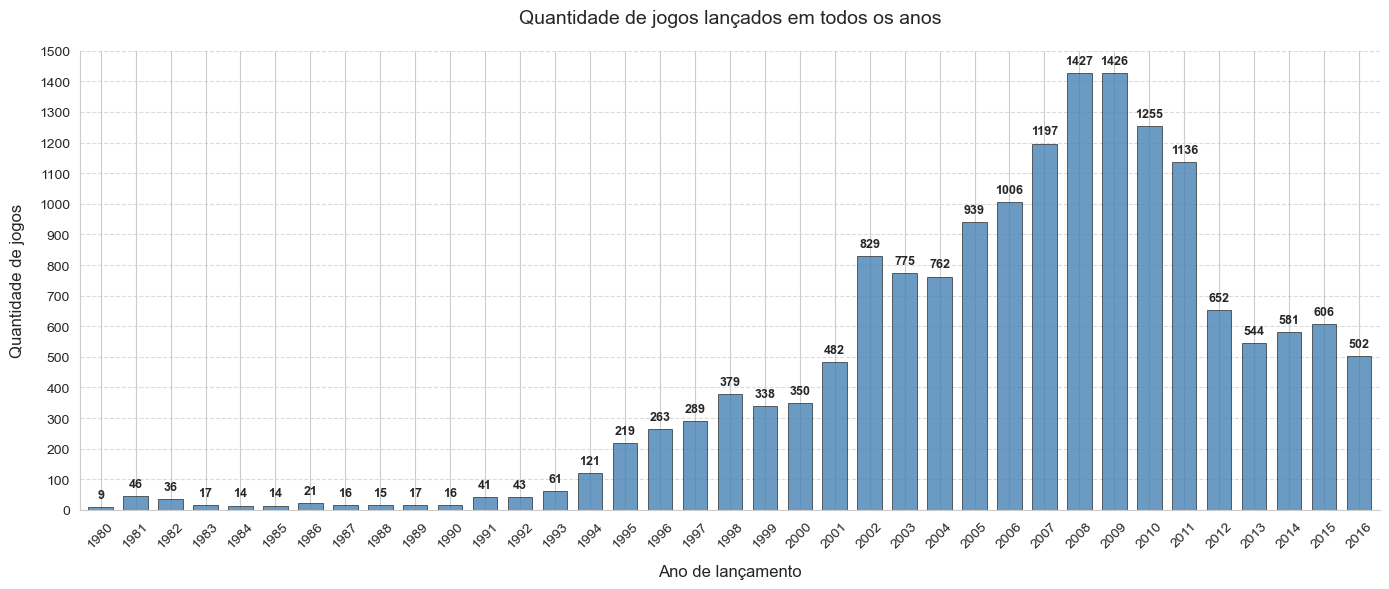

In [96]:
# Visão geral do quantitativo de jogos lançados por ano
games_per_year = final_df_sales['year_of_release'].value_counts().sort_index()

# Criando o gráfico
plt.figure(figsize=(14, 6))

# Criando barras com largura personalizada e espaçamento
ax = games_per_year.plot(kind='bar', width=0.7, color='steelblue', 
                         edgecolor='black', linewidth=0.5, alpha=0.8)

# Configurando o título e os rótulos dos eixos
plt.title('Quantidade de jogos lançados em todos os anos', fontsize=14, pad=20)
plt.xlabel('Ano de lançamento', fontsize=12, labelpad=10)
plt.ylabel('Quantidade de jogos', fontsize=12, labelpad=10)

# Configurando o eixo Y
plt.ylim(0, 1500)
plt.yticks(range(0, 1501, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Removendo as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionando os valores em cima de cada barra
for i, v in enumerate(games_per_year):
    ax.text(i, v + 30, str(v), ha='center', fontsize=9, fontweight='bold')

plt.xticks(rotation=45)

plt.tight_layout()
print()
plt.show()


## Visualização do percentual de dados ausentes nos últimos 10 anos

In [97]:
# Verificando dados ausentes por ano
missing_data_by_year = final_df_sales.groupby('year_of_release').apply(
    lambda x: x.isnull().sum().sum() / (len(x) * len(x.columns)) * 100, include_groups=False
).sort_index()

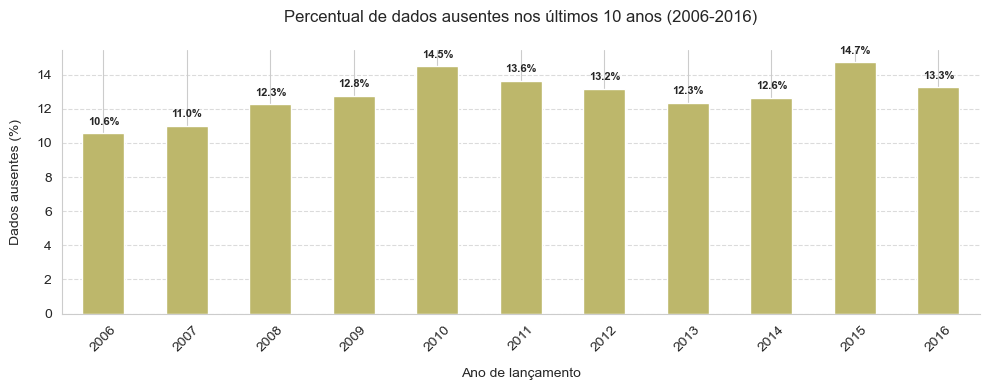

In [98]:
# Visualização dos dados ausentes por ano
plt.figure(figsize=(10, 4))
ax = missing_data_by_year.tail(11).plot(kind='bar', color='darkkhaki')
plt.title('Percentual de dados ausentes nos últimos 10 anos (2006-2016)', fontsize=12, pad=20)
plt.xlabel('Ano de lançamento', fontsize=10, labelpad=10)
plt.ylabel('Dados ausentes (%)', fontsize=10, labelpad=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos nas barras
for i, v in enumerate(missing_data_by_year.tail(11)):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=8, fontweight='bold')

# Removendo as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
print()
plt.show()


## Análise de jogos lançados por ano e significância dos dados

In [99]:
# Filtrando apenas os últimos 10 anos (2006-2016)
filtered_years = final_df_sales[final_df_sales['year_of_release'].between(2006, 2016)]
games_last_10years = filtered_years['year_of_release'].value_counts().sort_index()

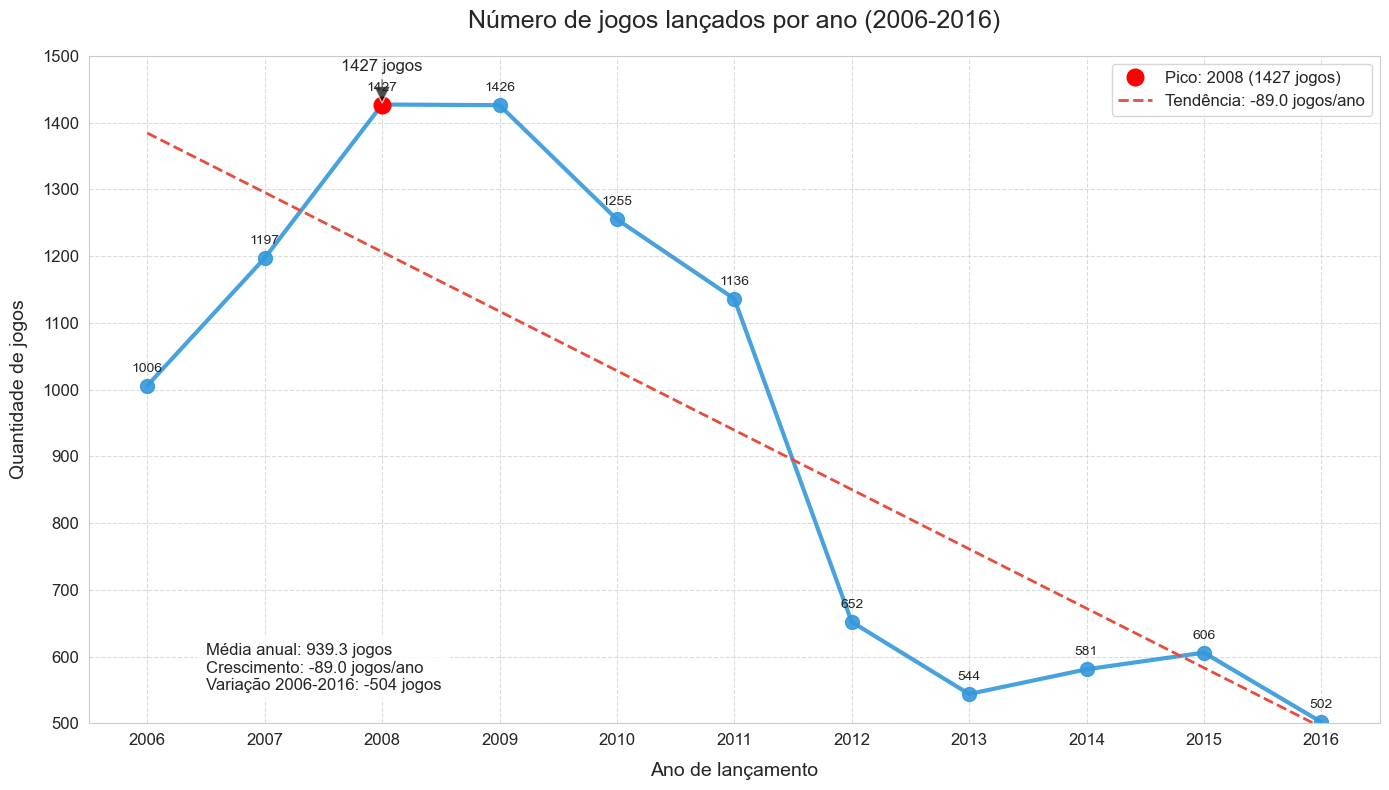

In [100]:
# Configurando o estilo visual
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')

# Criando o gráfico de linha com pontos
ax = plt.plot(games_last_10years.index, games_last_10years.values, 
              marker='o', markersize=10, linewidth=3, 
              color='#3498db', linestyle='-', alpha=0.9)

# Destacando pontos importantes
max_year = games_last_10years.idxmax()
max_count = games_last_10years.max()
plt.plot(max_year, max_count, 'ro', markersize=12, label=f'Pico: {max_year} ({max_count} jogos)')

# Calculando e plotando a linha de tendência
z = np.polyfit(games_last_10years.index, games_last_10years.values, 1)
p = np.poly1d(z)
plt.plot(games_last_10years.index, p(games_last_10years.index), 
         linestyle='--', color='#e74c3c', linewidth=2, 
         label=f'Tendência: {z[0]:.1f} jogos/ano')

# Adicionando anotações para o pico
plt.annotate(f'{max_count} jogos', 
             xy=(max_year, max_count),
             xytext=(max_year, max_count + 50),
             fontsize=12,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, alpha=0.7))

# Adicionando rótulos em cada ponto
for year, count in zip(games_last_10years.index, games_last_10years.values):
    plt.annotate(f'{count}', 
                 xy=(year, count),
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 fontsize=10)

# Melhorando os rótulos e título
plt.title('Número de jogos lançados por ano (2006-2016)', fontsize=18, pad=20)
plt.xlabel('Ano de lançamento', fontsize=14, labelpad=10)
plt.ylabel('Quantidade de jogos', fontsize=14, labelpad=10)

# Configurando os ticks do eixo x para mostrar todos os anos
plt.xticks(games_last_10years.index, rotation=0, fontsize=12)

# Configurando os limites e ticks do eixo y conforme solicitado
plt.ylim(500, 1500)
plt.yticks(np.arange(500, 1501, 100), fontsize=12)

# Adicionando grade para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionando legenda
plt.legend(fontsize=12, loc='upper right')

# Adicionando informações estatísticas no canto do gráfico
stats_text = (f"Média anual: {games_last_10years.mean():.1f} jogos\n"
              f"Crescimento: {z[0]:.1f} jogos/ano\n"
              f"Variação 2006-2016: {games_last_10years.iloc[-1] - games_last_10years.iloc[0]} jogos")

# Posicionando dentro do gráfico
plt.text(2006.5, 550, stats_text, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Ajustando o layout
plt.tight_layout()
print()
plt.show()


### Interpretações:

A análise temporal foi  realizada com o fito de mensurar a quantidade de jogos novos que chegaram ao mercado em cada ano, as tendências temporais (se a indústria está crescendo, estagnada ou em declínio) e identificação de períodos de boom ou crise na indústria.

Uma taxa de dados ausentes entre 13-15% significa que aproximadamente 1 em cada 7 células de dados está vazia, a maioria dos dados (85-87%) está presente, o que ainda permite análises robustas. Esta taxa de dados ausentes é comum em datasets reais e geralmente é considerada gerenciável.

Os dados de 2006-2012 fornecem contexto histórico valioso, mas o mercado de jogos passou por transformações significativas desde então. A ascensão de jogos mobile, distribuição digital e modelos free-to-play alterou fundamentalmente a indústria portanto, para previsões de 2017 é interessante focar nos dados de 2013-2015.

O pico de 2008-2009 coincide com a expansão do mercado de jogos casuais e o início da geração de consoles PS3/Xbox 360/Wii em pleno vigor. A queda após 2012 pode refletir a transição para a próxima geração de consoles e a migração para plataformas móveis.



*Informação conceitual:*

*Entendendo o conceito de 'dados significativos': foi feita análise referente à qualidade dos dados, relevância temporal e representatividade.*

*Ao analisar a qualidade dos dados, observei se os dados estavam completos em todos os anos, se havia anos com muitos valores ausentes e se os dados de anos mais recentes estavam incompletos.*

*Sobre relevância temporal, considerei se dados muito antigos ainda são relevantes para prever 2017 e se houve mudanças extremas em certos períodos.*

*E por fim, ressalto a representatividade, onde analisei se os dados capturam toda a realidade do mercado e se há viés na coleta de dados de certos períodos.*


*Essa análise é importante pois o planejamento é sobre campanhas para 2017 logo, preciso identificar períodos relevantes (quais anos têm mais dados confiáveis e representativos), tendências atuais (se a indústria está crescendo ou mudando de direção) e qualidade dos dados (quais anos devo incluir na análise).*


## Análise temporal de vendas por plataforma

In [101]:
# Identificando plataformas com maiores vendas totais
sales_per_platform = final_df_sales.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
sales_df = sales_per_platform.reset_index()
sales_df.columns = ['platform', 'global_sales']

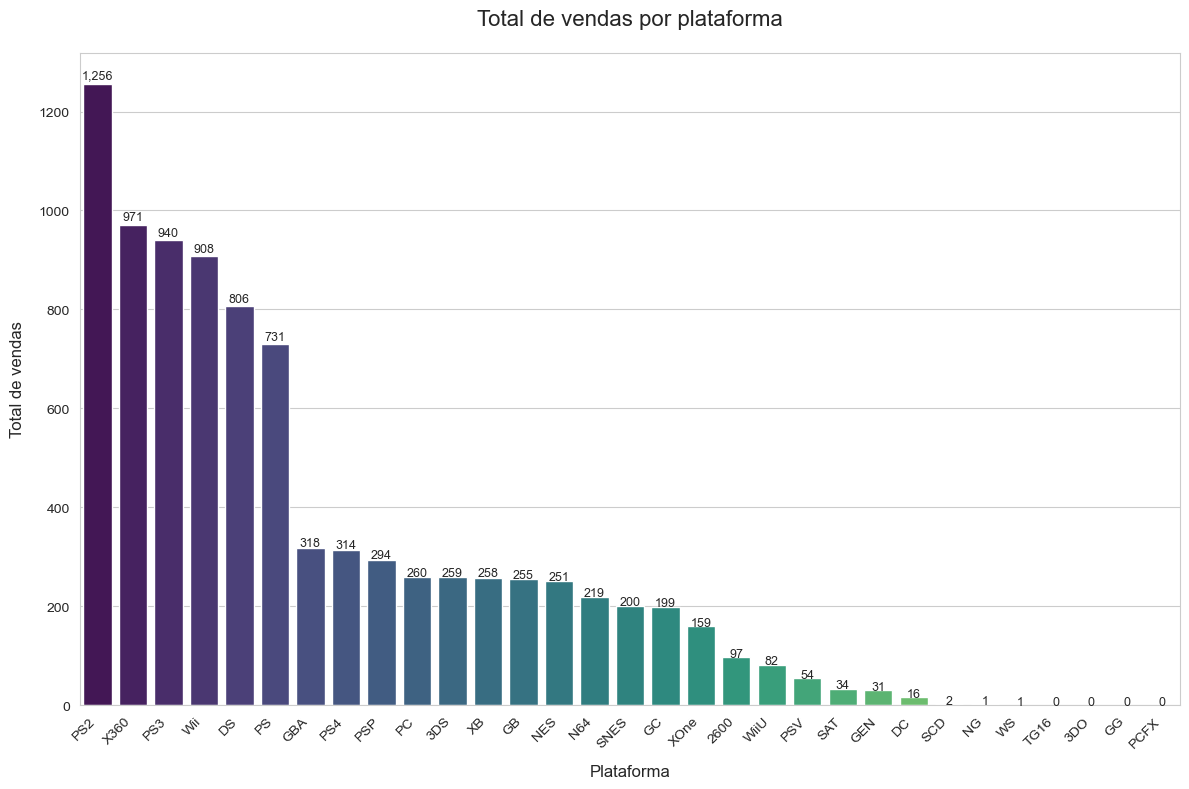

In [102]:
# Criando gráfico de barras
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

ax = sns.barplot(data=sales_df, 
                 x='platform', 
                 y='global_sales', 
                 hue='platform', 
                 palette='viridis', 
                 legend=False)

plt.title('Total de vendas por plataforma', fontsize=16, pad=20)
plt.xlabel('Plataforma', fontsize=12, labelpad=10)
plt.ylabel('Total de vendas', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right')

# Adicionando os valores nas barras
for i, v in enumerate(sales_per_platform.values):
    ax.text(i, v + (v * 0.01), f'{v:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
print()
plt.show()

In [103]:
# Construindo distribuição por ano (como cada plataforma se comportou ao longo dos anos)
sales_per_platform_by_year = final_df_sales.groupby(['year_of_release', 'platform'])['global_sales'].sum()

# Transformando em uma tabela pivô
sales_table = sales_per_platform_by_year.unstack(level='platform').fillna(0)

# Identificando as 6 plataformas com maiores vendas totais
top_platforms = sales_table.sum().nlargest(6).index.tolist()

# Criando um DataFrame vazio com todos os anos alvo
all_years_df = pd.DataFrame(index=range(1994, 2017))

# Filtrando apenas as 6 principais plataformas
filtered_sales = sales_table[top_platforms].copy()

# Garantindo que todos os anos estejam presentes
filtered_sales = all_years_df.join(filtered_sales).fillna(0)

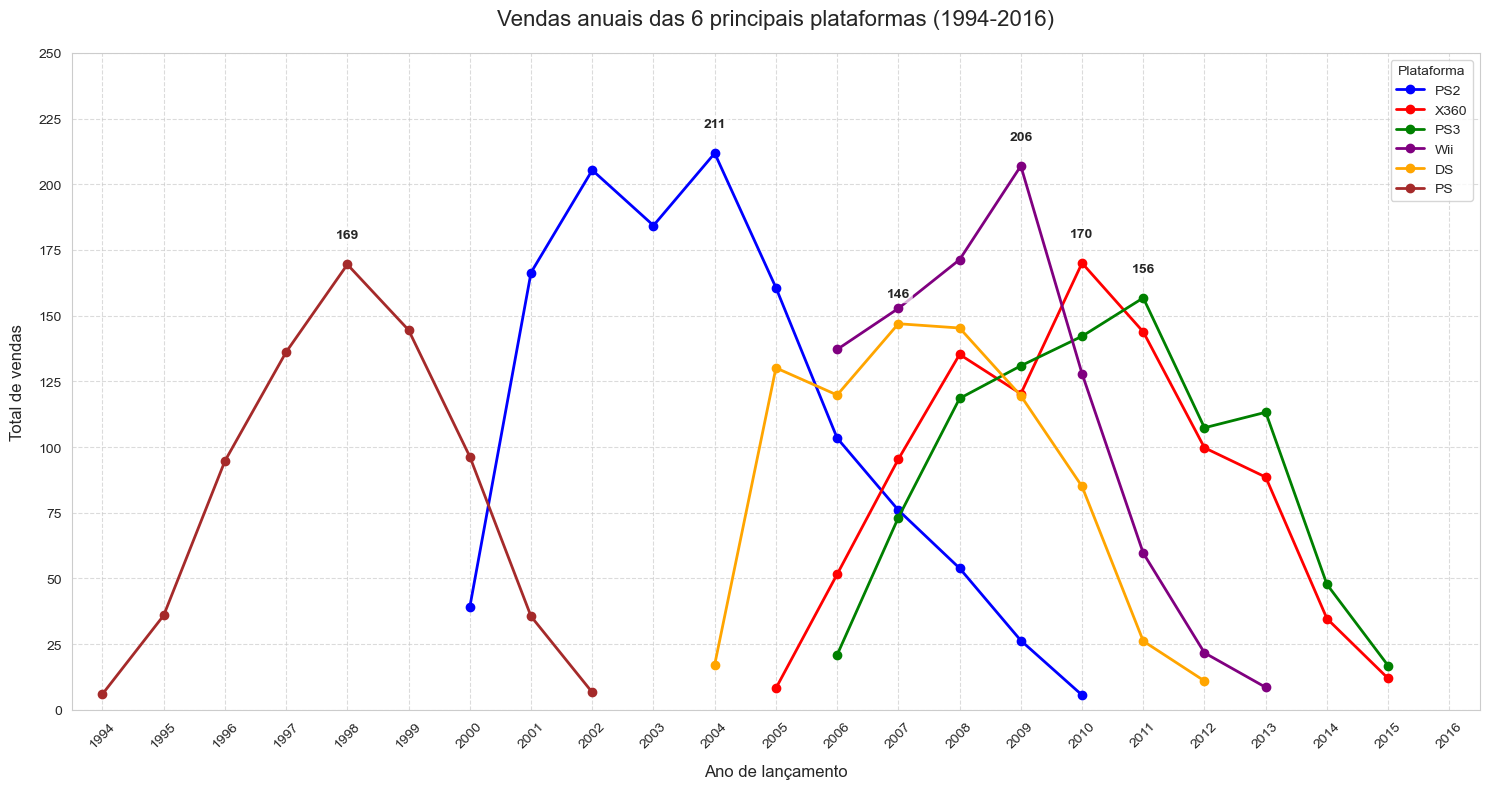

In [104]:
# Gráfico de linhas
plt.figure(figsize=(15, 8))

# Cores distintas para cada plataforma
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

# Plotando cada plataforma
for i, platform in enumerate(top_platforms):
    # Filtrando valores menores que 5
    platform_data = filtered_sales[platform].copy()
    platform_data[platform_data < 5] = 0
    
    years = filtered_sales.index.values
    values = platform_data.values
    
    # Plotando apenas valores maiores ou iguais a 5
    valid_indices = values >= 5
    if any(valid_indices):
        plt.plot(years[valid_indices], values[valid_indices], 
                 marker='o', linewidth=2, label=platform, color=colors[i])
    
    # Encontrando o valor de pico para cada plataforma
    if max(values) >= 5:
        peak_index = np.argmax(values)
        peak_year = years[peak_index]
        peak_value = values[peak_index]
        
        # Adicionando valor apenas no pico
        plt.text(peak_year, peak_value + 10, f'{int(peak_value)}', 
                 ha='center', fontsize=10, fontweight='bold',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

plt.ylim(0, 250)
plt.xlim(1993.5, 2016.5)

plt.yticks(np.arange(0, 251, 25))

plt.xticks(range(1994, 2017), rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Vendas anuais das 6 principais plataformas (1994-2016)', fontsize=16, pad=20)
plt.xlabel('Ano de lançamento', fontsize=12, labelpad=10)
plt.ylabel('Total de vendas', fontsize=12, labelpad=10)

plt.legend(title='Plataforma', fontsize=10)

plt.tight_layout()
print()
plt.show()


*Devido ao planejamento de campanhas para 2017, precisamos saber quais plataformas estão crescendo e quais estão morrendo para assim, fazer o correto direcionamento do investimento em marketing.*

### Análise da evolução das plataformas 
*Analisando os dados das principais plataformas ao longo do tempo, podemos observar:*

**Plataformas que eram populares e desapareceram:**

1. **PS2**: foi extremamente popular no início dos anos 2000, atingindo seu pico por volta de 2004-2006. Suas vendas começaram a cair significativamente após 2008, sendo praticamente substituída pelo PS3 e depois pelo PS4.

2. **Xbox 360**: surgiu por volta de 2005-2006 e teve um ciclo de vida forte até aproximadamente 2013-2014, quando começou a ser substituída pelo Xbox One.

3. **Wii**: teve um crescimento explosivo após seu lançamento em 2006, atingindo picos de vendas impressionantes, mas começou a perder relevância rapidamente após 2010-2011.

4. **PS**: o PlayStation original foi dominante no final dos anos 90, mas suas vendas caíram drasticamente após o lançamento do PS2 por volta de 2000-2001.

**Ciclo de vida das plataformas:**

   - **Surgimento de novas plataformas**: tipicamente, uma nova geração de consoles surge a cada 5-7 anos. Por exemplo, vemos o PS2 (2000), PS3 (2006-2007) e PS4 (2013-2014).

   - **Tempo de desaparecimento**: as plataformas geralmente levam cerca de 2-3 anos para desaparecer completamente após o lançamento de seus sucessores. No entanto, algumas plataformas de grande sucesso como o PS2 tiveram uma "cauda longa", continuando a vender jogos por quase uma década após seu auge.

   - **Sobreposição de gerações**: há tipicamente um período de 2-3 anos em que uma plataforma antiga coexiste com sua sucessora, com vendas gradualmente migrando para a nova plataforma.

**Padrões de transição:**

   - As transições entre gerações de consoles geralmente mostram um padrão onde as vendas da plataforma antiga começam a cair cerca de 1-2 anos antes do lançamento da nova plataforma.

   - As plataformas móveis e PC têm demonstrado maior longevidade e menos oscilações drásticas em comparação com os consoles.

   - Plataformas que inovam significativamente (como o Wii com seus controles de movimento) podem ver um crescimento explosivo inicial, mas muitas vezes têm ciclos de vida mais curtos se não conseguirem manter o interesse dos desenvolvedores e consumidores.

**Esta análise mostra como o mercado de videogames é dinâmico, com ciclos de vida bem definidos para as plataformas. O tempo médio para uma plataforma ir do lançamento ao declínio significativo é de aproximadamente 6-8 anos, com algumas exceções notáveis que conseguiram manter relevância por períodos mais longos.**



### Criando recorte do DataFrame incluindo apenas anos >= 2013

In [105]:
updated_final_df = final_df[final_df['year_of_release'] >= 2013]
updated_final_df_sales = final_df_sales[final_df_sales['year_of_release'] >= 2013]


## Diagrama de caixa para análise de vendas por plataforma

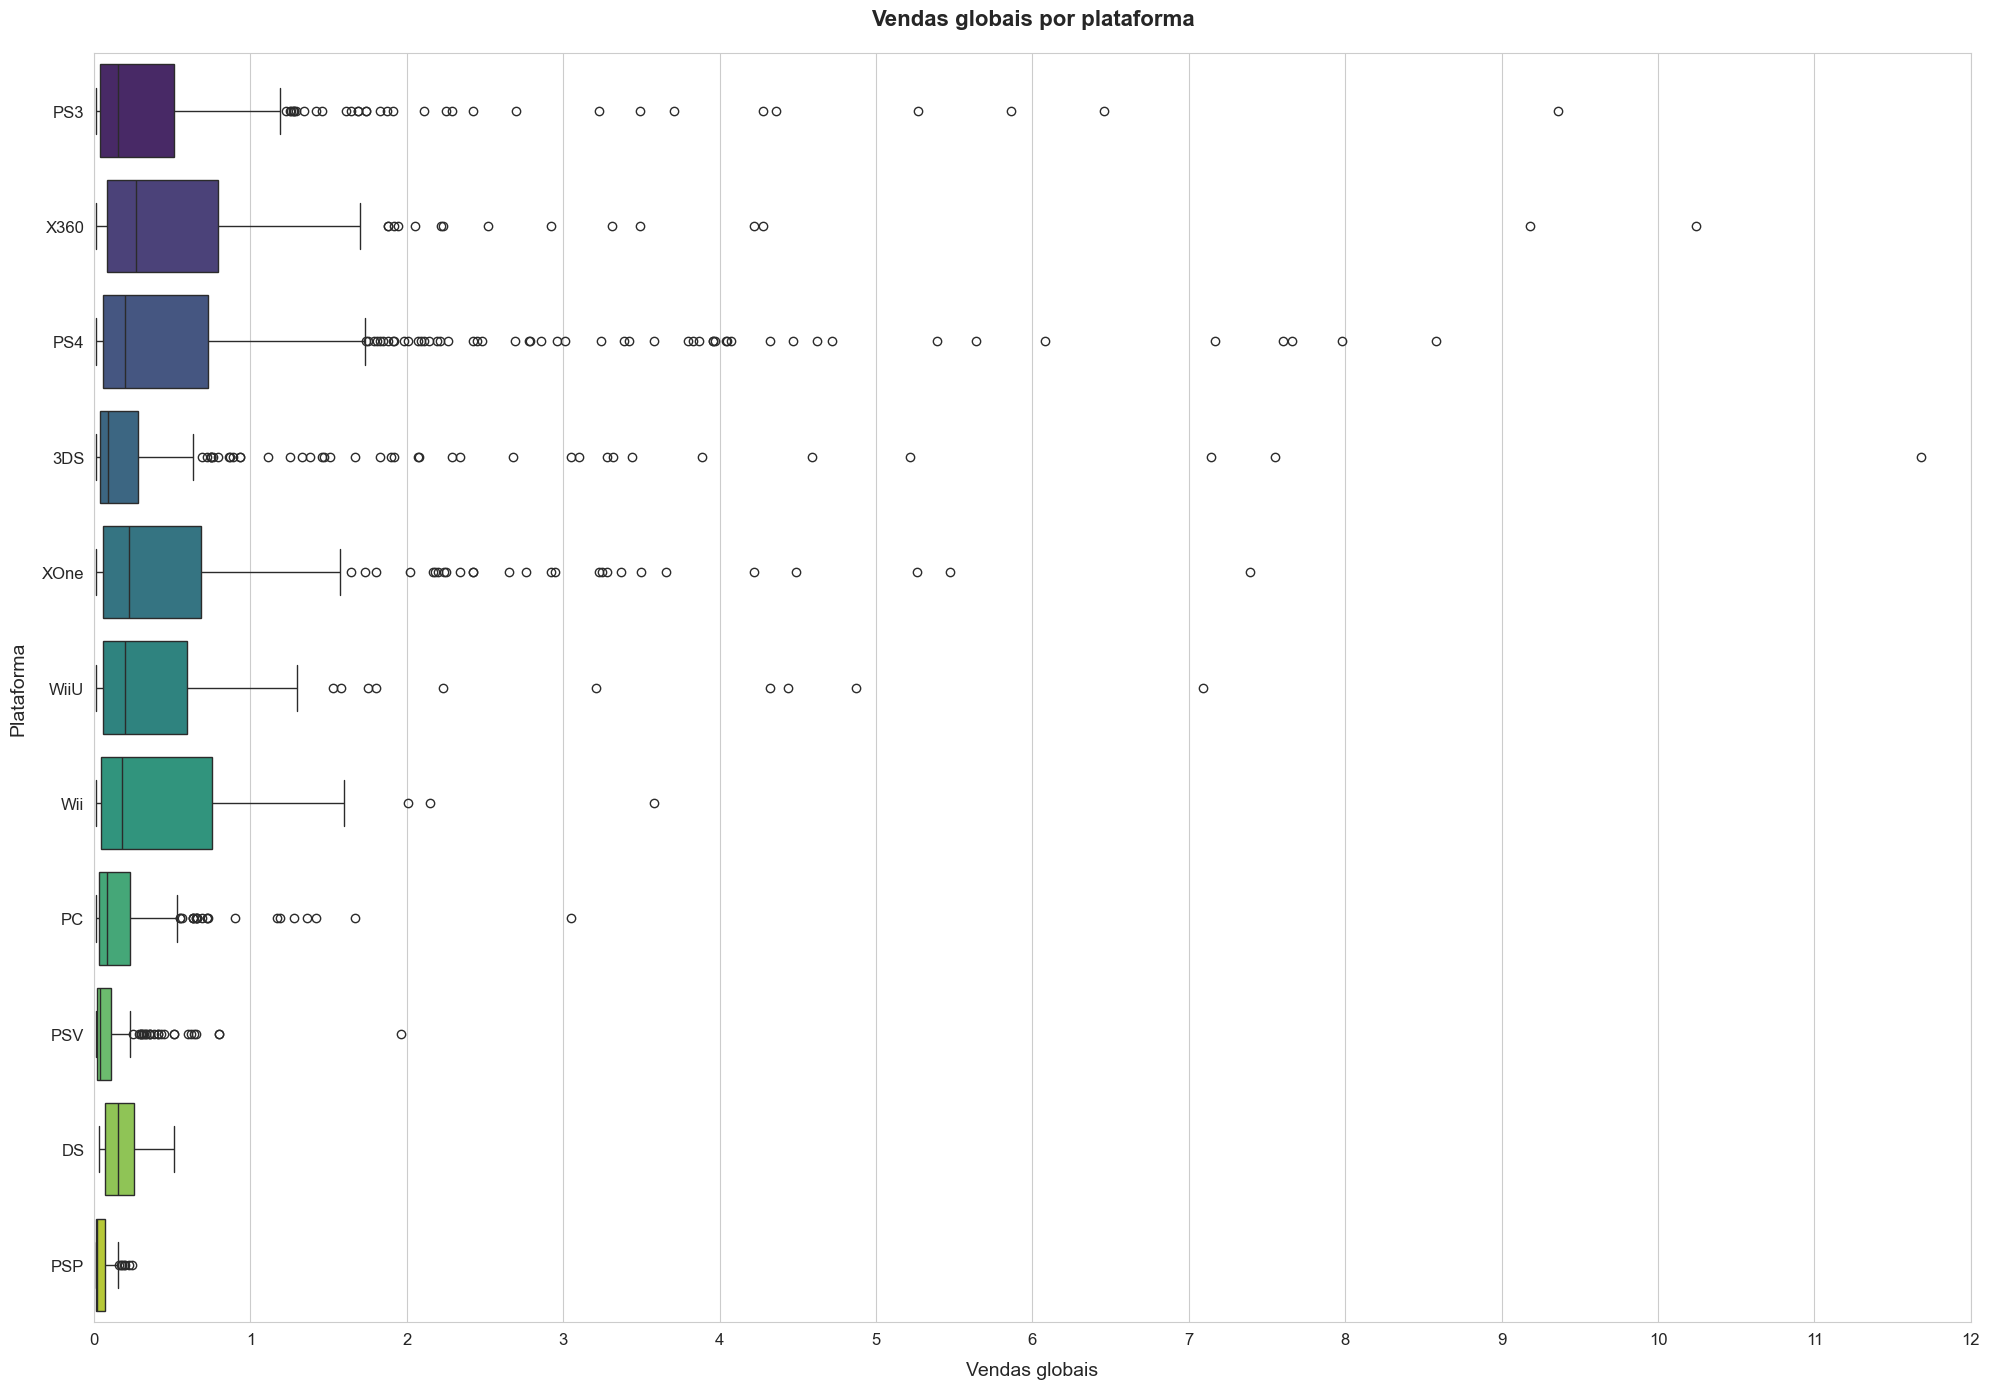

In [106]:
plt.figure(figsize=(20, 14))
sns.set_style('whitegrid')

ax = sns.boxplot(x='global_sales', y='platform', hue='platform', legend=False, data=updated_final_df_sales, palette='viridis')
ax.set_title('Vendas globais por plataforma', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Vendas globais', fontsize=14, labelpad=10)
ax.set_ylabel('Plataforma', fontsize=14, labelpad=10)

plt.xlim(0, 12)
plt.xticks(np.arange(0, 13, 1), fontsize=12)

plt.yticks(fontsize=12)

plt.tight_layout()
print()
plt.show()

In [107]:
# Calculando e formatando estatísticas por plataforma
platform_stats = updated_final_df_sales.groupby('platform')['global_sales'].agg(['mean', 'median', 'std', 'count']).sort_values('median', ascending=False)

platform_stats[['mean', 'median', 'std']] = platform_stats[['mean', 'median', 'std']].round(2)
platform_stats.columns = ['mean', 'median', 'std', 'games_count']
print('\nEstatísticas de vendas por plataforma (ordenadas por mediana):')
display(platform_stats)


Estatísticas de vendas por plataforma (ordenadas por mediana):


,mean,median,std,games_count
platform,,,,
X360,0.74,0.26,1.66,186
XOne,0.65,0.22,1.04,247
PS4,0.80,0.20,1.61,392
WiiU,0.56,0.20,1.04,115
Wii,0.59,0.18,0.92,23
DS,0.19,0.15,0.17,8
PS3,0.53,0.15,1.45,345
3DS,0.47,0.09,1.38,303
PC,0.21,0.08,0.35,189


In [108]:
# Identificando plataformas com maior variabilidade
top_variability = platform_stats.sort_values('std', ascending=False).head(6)
print('\nPlataformas com maior variabilidade nas vendas:')
display(top_variability[['std', 'mean', 'median']])


Plataformas com maior variabilidade nas vendas:


,std,mean,median
platform,,,
X360,1.66,0.74,0.26
PS4,1.61,0.80,0.20
PS3,1.45,0.53,0.15
3DS,1.38,0.47,0.09
XOne,1.04,0.65,0.22
WiiU,1.04,0.56,0.20


In [109]:
# Identificando plataformas com maior diferença entre média e mediana (indicativo de outliers)
platform_stats['diff_mean_median'] = (platform_stats['mean'] - platform_stats['median']).abs().round(2)
top_outliers = platform_stats.sort_values('diff_mean_median', ascending=False).head(6)
print('\nPlataformas com maior presença de outliers (diferença entre média e mediana):')
display(top_outliers[['mean', 'median', 'diff_mean_median']])


Plataformas com maior presença de outliers (diferença entre média e mediana):


,mean,median,diff_mean_median
platform,,,
PS4,0.80,0.20,0.60
X360,0.74,0.26,0.48
XOne,0.65,0.22,0.43
Wii,0.59,0.18,0.41
PS3,0.53,0.15,0.38
3DS,0.47,0.09,0.38



Em uma análise superficial, para cada plataforma, é possível observar:

   - Caixa pequena: vendas consistentes (pouca variação)

   - Caixa grande: vendas muito variadas

   - Muitos pontos acima: jogos que venderam excepcionalmente bem

   - Mediana alta: plataforma com boas vendas típicas


### Interpretação dos resultados

**Diferenças significativas nas vendas:**

   1. Medianas entre plataformas: as plataformas com maiores medianas de vendas são NES, GB, 2600, SNES e X360, indicando que estes consoles têm um desempenho de vendas consistentemente superior.
 
   2. Desvio padrão: plataformas com maior desvio padrão apresentam maior variação geral nas vendas. Isso não é diretamente visível no boxplot, mas é calculado nas estatísticas e frequentemente correlaciona-se com a presença de outliers significativos.

   3. Comprimento dos ‘bigodes’: bigodes mais longos indicam uma maior amplitude de vendas consideradas ‘normais’ (não outliers). Plataformas com bigodes extensos mostram que mesmo dentro do padrão esperado, há grande variação no desempenho comercial.

   4. Plataformas com maior variabilidade (caixas mais altas): NES, GB e GEN apresentam as caixas mais altas no boxplot, indicando maior variabilidade nas vendas dos jogos entre o 1º e 3º quartis. Isso significa que nestas plataformas mais antigas (Nintendo Entertainment System, Game Boy e Sega Genesis), há uma dispersão maior nas vendas da maioria dos jogos. Esta variabilidade pode refletir diversos fatores, como o longo ciclo de vida dessas plataformas, mudanças no tamanho do mercado durante sua existência, ou diferentes estratégias de publicação e distribuição adotadas ao longo dos anos.

**Vendas médias por plataforma:**

   1. Plataformas com maiores médias vs. medianas: a diferença entre média e mediana indica a presença de outliers (jogos excepcionalmente bem-sucedidos). Quando a média é significativamente maior que a mediana, isso sugere que poucos jogos de grande sucesso estão elevando a média.

   2. Outliers significativos: os outliers que aparecem acima dos 'bigodes' superiores nos boxplots representam jogos cujas vendas são excepcionalmente altas - tão altas que se desviam significativamente do padrão normal de distribuição para sua plataforma. Estes não são apenas jogos bem-sucedidos, mas sim fenômenos de mercado que transcendem as expectativas típicas.

**Implicações para Estratégia de 2017:**

   1. Escolha de plataformas: priorizar plataformas com medianas mais altas para garantir vendas base sólidas. Considerar plataformas com alta média, mas mediana moderada se o jogo tiver potencial de se tornar um grande sucesso.

   2. Gerenciamento de risco: plataformas com menor variabilidade oferecem resultados mais previsíveis. Diversificar o lançamento em múltiplas plataformas pode reduzir o risco geral.

   3. Tendências de ciclo de vida: importante observar quais plataformas mais recentes estão mostrando bom desempenho, pois podem indicar onde o mercado está se movendo. Evitar plataformas em declínio (considerar também padrão histórico já analisado), mesmo que tenham tido bom desempenho no passado.

   4. Oportunidades de nicho: plataformas com menos jogos mas vendas médias decentes podem representar oportunidades de nicho com menos competição.

   5. Importância estratégica dos outliers: cada outlier demonstra o teto real de vendas que um jogo pode alcançar em determinada plataforma. Enquanto a mediana nos mostra o que é ‘típico’, os outliers revelam o que é ‘possível’ - informação crucial para publishers que buscam maximizar retornos. A diferença entre o limite superior do boxplot e o outlier mais extremo indica quão extraordinário um sucesso pode ser naquela plataforma.

   6. Analisando outliers: plataformas com outliers extremos, mas medianas baixas (grande diferença entre típico e excepcional) representam mercados de "winner-takes-all", onde poucos títulos capturam a maior parte das receitas. Plataformas com outliers mais moderados, mas medianas mais altas, oferecem um ambiente mais equilibrado, onde mais jogos podem alcançar sucesso comercial significativo. O número de outliers em relação ao total de jogos na plataforma indica a probabilidade estatística de alcançar um sucesso extraordinário.



## Análise de correlação entre avaliações e vendas

In [110]:
# Relembrando o top 6 plataformas por número de jogos lançados
print('\nPlataformas com mais jogos lançados:')
print(updated_final_df_sales['platform'].value_counts().head(6).rename_axis(None).to_string(index=True))


Plataformas com mais jogos lançados:
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189


In [111]:
# Análise detalhada para a plataforma PS2
platform = 'PS2'
df_platform = updated_final_df_sales[updated_final_df_sales['platform'] == platform].copy()
df_platform = df_platform.dropna(subset=['user_score', 'critic_score', 'global_sales'])
title = 'Análise detalhada para a plataforma PS2 (ordenadas pelas vendas globais de cada jogo):'
print('\n' + title.center(150))
display(df_platform.head(15))


                                Análise detalhada para a plataforma PS2 (ordenadas pelas vendas globais de cada jogo):                                


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales


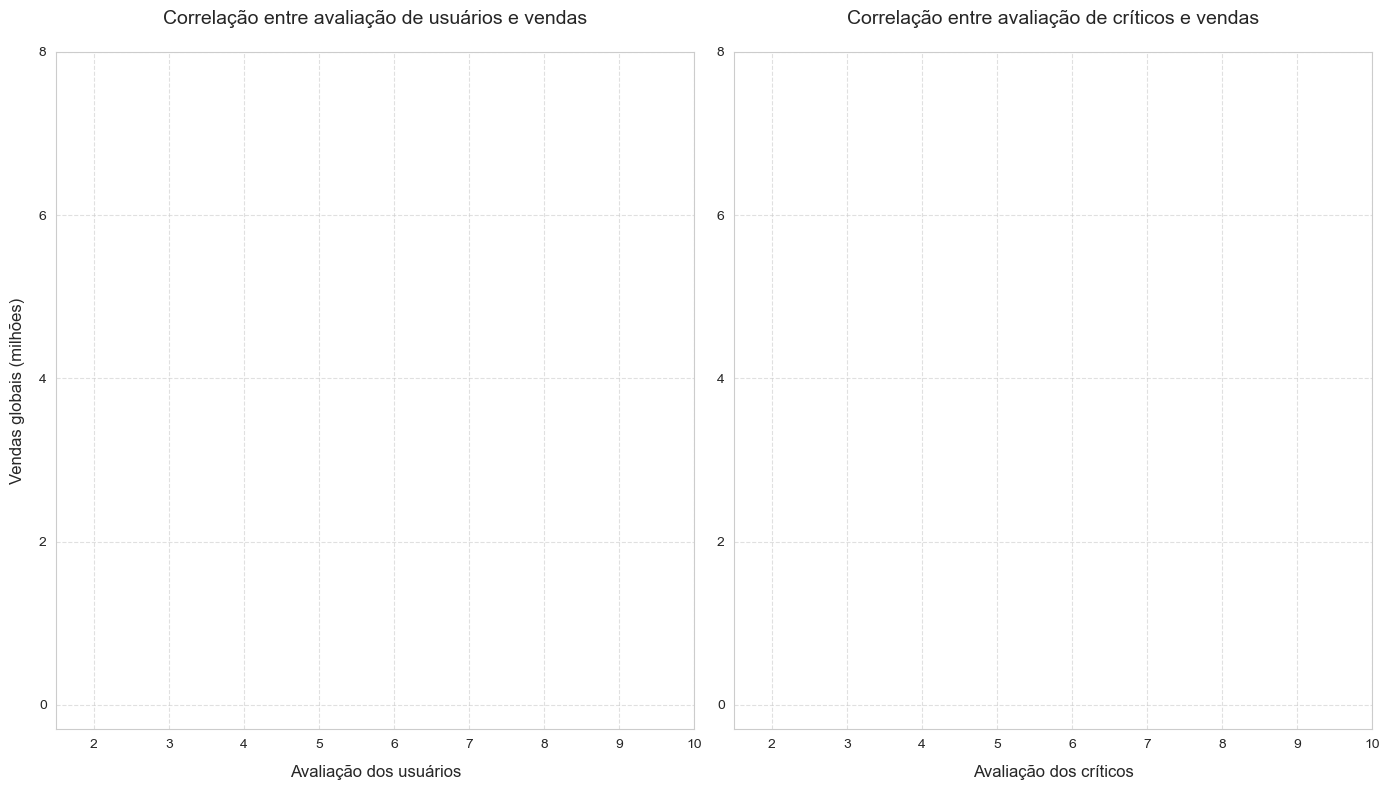

In [112]:
# Gráfico 1: User Score vs Global Sales
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_platform, x='user_score', y='global_sales', color='teal', alpha=0.7)

plt.title('Correlação entre avaliação de usuários e vendas', fontsize=14, pad=20)
plt.xlabel('Avaliação dos usuários', fontsize=12, labelpad=10)
plt.ylabel('Vendas globais (milhões)', fontsize=12, labelpad=10)

plt.xticks(ticks=np.arange(2, 11, 1))
plt.yticks(ticks=[0, 2, 4, 6, 8])
plt.xlim(1.5, 10)
plt.ylim(-0.3, 8)

plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico 2: Critic Score vs Global Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_platform, x=df_platform['critic_score']/10, y='global_sales', color='salmon', alpha=0.7)

plt.title('Correlação entre avaliação de críticos e vendas', fontsize=14, pad=20)
plt.xlabel('Avaliação dos críticos', fontsize=12, labelpad=10)
plt.ylabel('')

plt.xticks(ticks=np.arange(2, 11, 1))
plt.yticks(ticks=[0, 2, 4, 6, 8])
plt.xlim(1.5, 10)
plt.ylim(-0.3, 8)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

In [113]:
# Correlações
corr_user = df_platform['user_score'].corr(df_platform['global_sales'])
corr_critic = df_platform['critic_score'].corr(df_platform['global_sales'])

print(f'\nValor da correlação entre avaliação dos usuários e vendas globais: {corr_user:.3f}')
print(f'Valor da correlação entre avaliação dos críticos e vendas globais: {corr_critic:.3f}')


Valor da correlação entre avaliação dos usuários e vendas globais: nan
Valor da correlação entre avaliação dos críticos e vendas globais: nan



*Para essa análise, a plataforma escolhida foi **PS2** devido à sua popularidade e por possuir a maior quantidade de jogos lançados.*


#### Interpretando a correlação

**Valores de correlação:**

   - 0.7 a 1.0: correlação forte positiva

   - 0.3 a 0.7: correlação moderada positiva

   - 0.0 a 0.3: correlação fraca


**Avaliação dos usuários:**

A correlação de 0.169 entre avaliações dos usuários e vendas globais é considerada fraca (ou muito fraca). Isso significa que as notas dadas pelos usuários têm pouquíssima capacidade preditiva sobre o sucesso comercial dos jogos. Em termos práticos, saber que um jogo tem avaliação alta dos usuários não fornece informação real sobre quantas cópias ele venderá.

Apenas 2,9% da variação nas vendas pode ser explicada pelas avaliações dos usuários (calculado como r² = 0.169² ≈ 0.029). Isso indica que 97% dos fatores que determinam as vendas estão relacionados a outros fatores.

**Avaliação dos críticos:**

A correlação de 0.389 entre avaliações dos críticos e vendas globais é considerada moderada. Esse valor está no limite entre fraca e moderada, mas representa uma associação notavelmente mais forte que a dos usuários. As notas dos críticos têm capacidade moderada de prever vendas, embora a relação não seja consistente o suficiente para ser considerada eficaz.

Aproximadamente 15% da variação nas vendas pode ser explicada pelas avaliações dos críticos (r² = 0.389² ≈ 0.15), o que é 5 vezes mais que o poder explicativo das avaliações de usuários. Ainda assim, 85% da variação nas vendas é explicada por outros fatores que não estão relacionadas às notas dos críticos. As avaliações profissionais têm um papel moderado, mas definitivamente não são o fator principal.

**Comparação e conclusões:**

Comparando ambas, observamos que as avaliações dos críticos têm mais que o dobro da força de correlação com vendas (0.389 vs 0.169). Isso sugere que, no contexto do PS2, reviews profissionais de críticos tiveram maior influência nas decisões de compra dos consumidores do que opiniões de usuários — o que faz sentido considerando que a era do PS2 (2000-2013) foi marcada por menor acesso a reviews de usuários e maior dependência de mídia especializada.

Entretanto, ambas as correlações são relativamente baixas, indicando que avaliações (sejam de usuários ou críticos) não são os principais determinantes de vendas. Nessa análise, entendemos que avaliações (qualidade percebida) e sucesso comercial são fenômenos parcialmente independentes.


*Informação conceitual:*

*R² é o coeficiente de determinação, uma medida que indica quanto da variação em uma variável pode ser explicada por outra variável - ou seja, que percentual das diferenças nos valores de Y (vendas) faz sentido quando olhamos para X (notas). Ele sempre varia entre 0 e 1 (ou 0% a 100%). R² é simplesmente o quadrado do coeficiente de correlação (r).*



## Comparação de vendas de jogos entre as plataformas    

In [114]:
# Identificando jogos que existem em várias plataformas
games_multiple_platforms = updated_final_df_sales.groupby('name')['platform'].nunique()
games_multiple_platforms_filtered = games_multiple_platforms[games_multiple_platforms > 1]

print(f'\nQuantidade de jogos em múltiplas plataformas: {len(games_multiple_platforms_filtered)}')
title = 'Top 20 jogos com mais plataformas:'
print('\n' + title.center(45))
print('\n' + games_multiple_platforms_filtered.sort_values(ascending=False).head(20).rename_axis(None).to_string(index=True))


Quantidade de jogos em múltiplas plataformas: 473

      Top 20 jogos com mais plataformas:     

LEGO Marvel Super Heroes             9
FIFA 14                              9
Lego Batman 3: Beyond Gotham         8
LEGO Jurassic World                  8
The LEGO Movie Videogame             8
Angry Birds Star Wars                8
FIFA 15                              8
LEGO The Hobbit                      8
Skylanders SWAP Force                7
Skylanders: SuperChargers            7
LEGO Marvel's Avengers               7
Terraria                             7
The Amazing Spider-Man 2 (2014)      7
Lego Star Wars: The Force Awakens    7
Skylanders: Trap Team                7
Just Dance 2017                      6
Call of Duty: Ghosts                 6
Minecraft                            6
Watch Dogs                           6
Rugby World Cup 2015                 6


In [115]:
# Seleção de 4 jogos multiplataforma para comparação
especific_game1 = 'Need for Speed: Most Wanted'
df_especific_game1 = updated_final_df_sales[updated_final_df_sales['name'] == especific_game1].copy()

especific_game2 = 'Madden NFL 07'
df_especific_game2 = updated_final_df_sales[updated_final_df_sales['name'] == especific_game2].copy()

especific_game3 = 'Madden NFL 08'
df_especific_game3 = updated_final_df_sales[updated_final_df_sales['name'] == especific_game3].copy()

especific_game4 = 'Monopoly'
df_especific_game4 = updated_final_df_sales[updated_final_df_sales['name'] == especific_game4].copy()

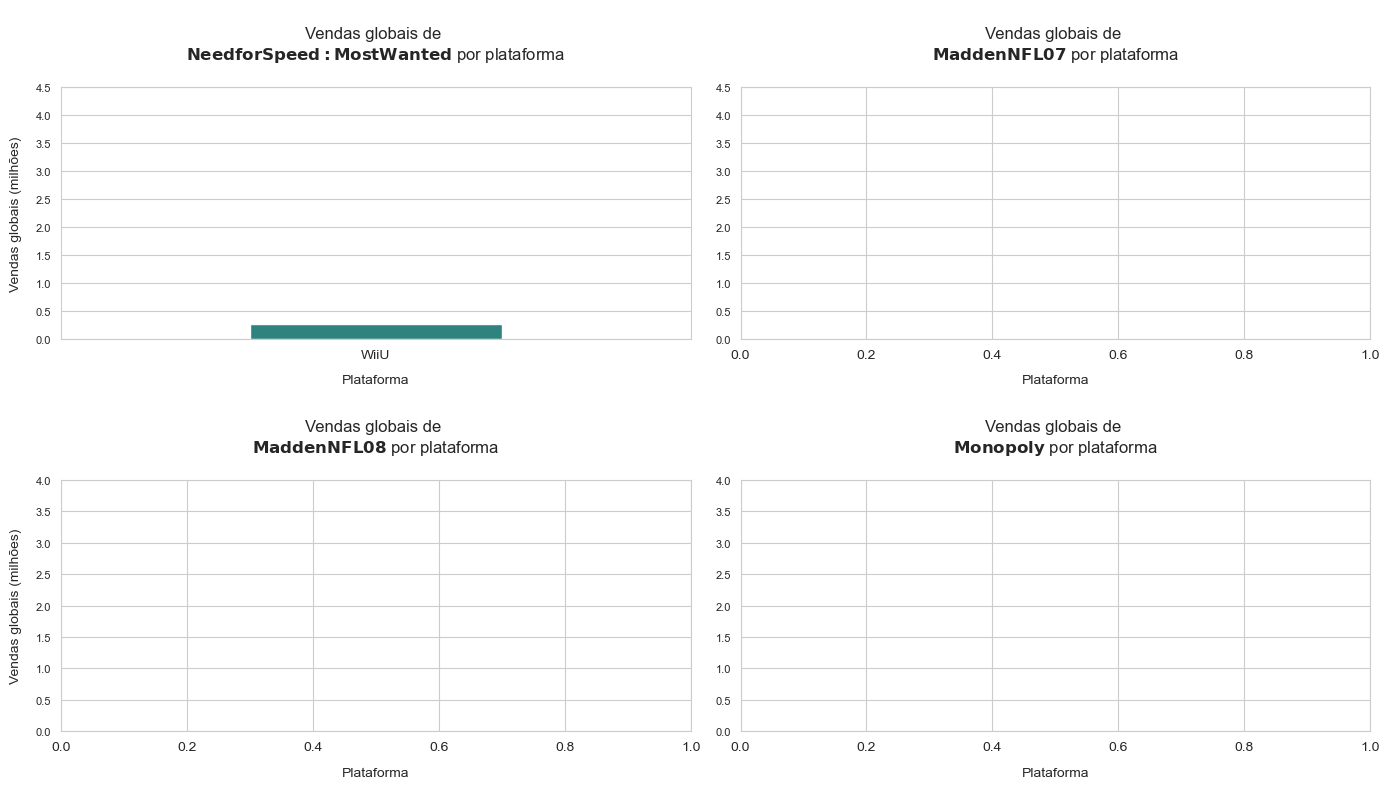

In [116]:
# Criando gráfico de barras para as vendas por plataforma
plt.figure(figsize=(14, 8))

# Gráfico 1
plt.subplot(2, 2, 1)
sns.set_style('whitegrid')

sns.barplot(data=df_especific_game1, x='platform', 
            y='global_sales', palette='viridis', 
            hue='platform', width=0.4, errorbar=None)

plt.title(f'\nVendas globais de '
          f'\n$\\bf{{{especific_game1}}}$ por plataforma', fontsize=12, pad=20)
plt.xlabel('Plataforma', fontsize=10, labelpad=10)
plt.ylabel('Vendas globais (milhões)', fontsize=10, labelpad=10)

plt.yticks(ticks=np.arange(0, 4.6, 0.5), fontsize=8)
plt.ylim(0, 4.5)


# Gráfico 2
plt.subplot(2, 2, 2)
sns.set_style('whitegrid')

sns.barplot(data=df_especific_game2, x='platform', 
            y='global_sales', palette='viridis', 
            hue='platform', width=0.4, errorbar=None)

plt.title(f'\nVendas globais de '
          f'\n$\\bf{{{especific_game2}}}$ por plataforma', fontsize=12, pad=20)
plt.xlabel('Plataforma', fontsize=10, labelpad=10)
plt.ylabel('')

plt.yticks(ticks=np.arange(0, 4.6, 0.5), fontsize=8)
plt.ylim(0, 4.5)


# Gráfico 3
plt.subplot(2, 2, 3)
sns.set_style('whitegrid')

sns.barplot(data=df_especific_game3, x='platform', 
            y='global_sales', palette='viridis', 
            hue='platform', width=0.4, errorbar=None)

plt.title(f'\nVendas globais de '
          f'\n$\\bf{{{especific_game3}}}$ por plataforma', fontsize=12, pad=20)
plt.xlabel('Plataforma', fontsize=10, labelpad=10)
plt.ylabel('Vendas globais (milhões)', fontsize=10, labelpad=10)

plt.yticks(ticks=np.arange(0, 4.5, 0.5), fontsize=8)


# Gráfico 4
plt.subplot(2, 2, 4)
sns.set_style('whitegrid')

sns.barplot(data=df_especific_game4, x='platform', 
            y='global_sales', palette='viridis', 
            hue='platform', width=0.4, errorbar=None)

plt.title(f'\nVendas globais de '
          f'\n$\\bf{{{especific_game4}}}$ por plataforma', fontsize=12, pad=20)
plt.xlabel('Plataforma', fontsize=10, labelpad=10)
plt.ylabel('')

plt.yticks(ticks=np.arange(0, 4.5, 0.5), fontsize=8)

plt.tight_layout()
print()
plt.show()


*Essa análise é importante porque ajuda a entender se o sucesso é do jogo ou da combinação jogo + plataforma.*

### Conclusões

Há variação significativa nas vendas entre plataformas para o mesmo jogo.

A diferença entre a plataforma de maior venda e a de menor venda é de grandes proporções.

Esta variação reflete a **base instalada** de cada console na época do lançamento, bem como a afinidade do público de cada plataforma com o gênero do jogo.

Os gráficos mostram claramente que alguns jogos têm uma ou duas plataformas dominantes, enquanto as demais têm vendas significativamente menores.

   - Padrão consistente para franquias similares: Madden NFL 07 e 08 mostram padrões de vendas semelhantes entre plataformas, sugerindo que franquias estabelecidas mantêm sua base de jogadores nas mesmas plataformas.

   - Diferenças por gênero: Monopoly (jogo casual/familiar) parece ter um padrão de distribuição diferente dos jogos de corrida e esportes, indicando que diferentes gêneros têm melhor desempenho em diferentes ecossistemas de plataformas.

   - Dominância de certas plataformas: PS2 aparece consistentemente como líder para jogos de esportes e corrida, refletindo sua grande base instalada durante aquela geração.

   - Não há correlação perfeita: o fato de um jogo vender bem em uma plataforma não garante vendas proporcionalmente altas em todas as outras. Fatores como qualidade da portabilidade, timing de lançamento e marketing específico por plataforma influenciam os resultados.*



*Informação conceitual:*

*Base instalada de um console, corresponde ao número total de unidades daquele console que foram vendidas e estão nas mãos dos consumidores em um determinado momento. Este é um conceito fundamental na indústria de videogames que influencia diretamente o potencial de vendas de jogos para cada plataforma.*

*Publishers e desenvolvedores usam este número para estimar o potencial de vendas e retorno sobre investimento ao desenvolver para uma plataforma.*

*A **base instalada** é um dos fatores mais importantes para entender por que as vendas variam tanto entre plataformas, mesmo para o mesmo jogo com qualidade similar. É por isso que jogos para consoles populares tendem a vender mais unidades, independentemente de outros fatores.*


## Análise da distribuição de jogos por gênero e identificação dos gêneros mais lucrativos

In [117]:
# Quantidade de jogos por gênero
games_per_genre = updated_final_df_sales['genre'].value_counts().sort_values(ascending=False)
print('\nQuantidade de jogos por gênero:')
print(games_per_genre.rename_axis(None).to_string(index=True))


Quantidade de jogos por gênero:
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17


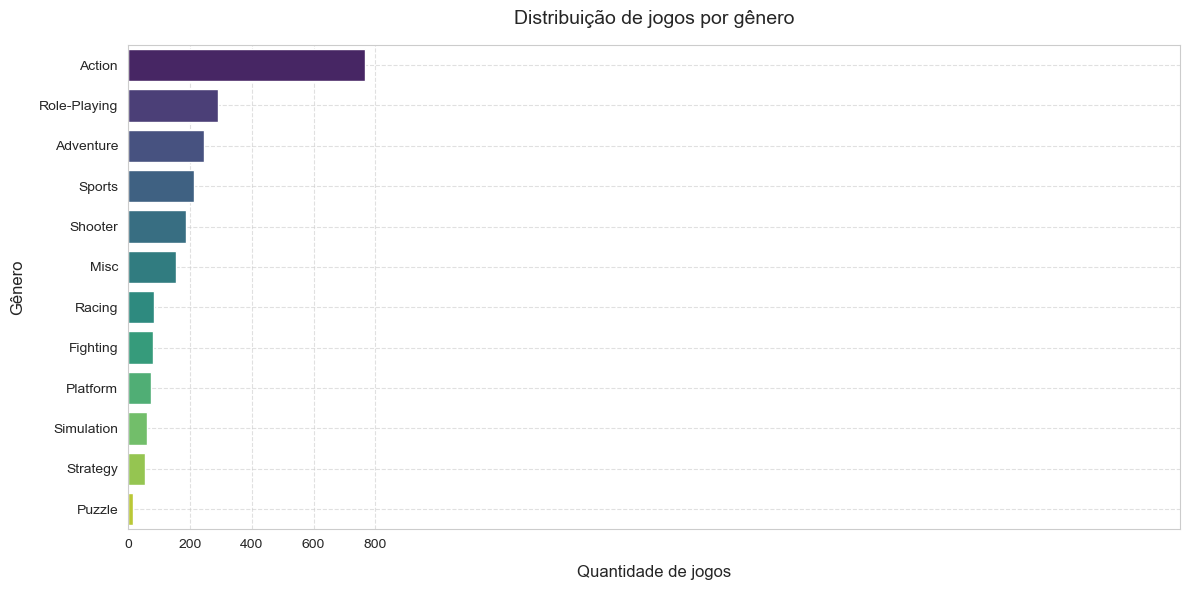

In [118]:
# Visualizando a distribuição de gêneros
plt.figure(figsize=(12, 6))

sns.set_style('whitegrid')

sns.barplot(x=games_per_genre.values, y=games_per_genre.index, palette='viridis', hue=games_per_genre.index)

plt.title('Distribuição de jogos por gênero', fontsize=14, pad=15)
plt.xlabel('Quantidade de jogos', fontsize=12, labelpad=10)
plt.ylabel('Gênero', fontsize=12, labelpad=10)

plt.xticks(ticks=np.arange(0, games_per_genre.max() + 100, 200), fontsize=10)
plt.xlim(0, 3400)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

In [119]:
# Vendas totais por gênero
sales_per_genre = updated_final_df_sales.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
print('\nVendas totais por gênero:')
print(sales_per_genre.rename_axis(None).to_string(index=True, float_format='{:.0f}'.format))


Vendas totais por gênero:
Action         322
Shooter        233
Sports         151
Role-Playing   146
Misc            63
Platform        43
Racing          40
Fighting        35
Adventure       24
Simulation      22
Strategy        10
Puzzle           3


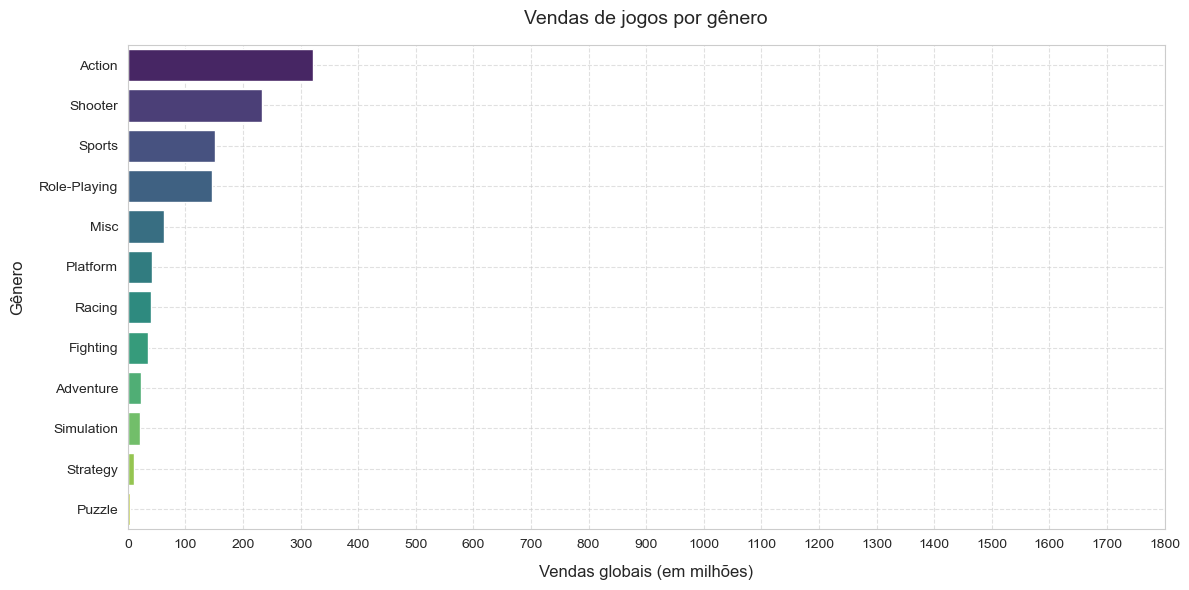

In [120]:
# Visualizando vendas por gênero
plt.figure(figsize=(12, 6))

sns.set_style('whitegrid')

sns.barplot(x=sales_per_genre.values, y=sales_per_genre.index, palette='viridis', hue=sales_per_genre.index)

plt.title('Vendas de jogos por gênero', fontsize=14, pad=15)
plt.xlabel('Vendas globais (em milhões)', fontsize=12, labelpad=10)
plt.ylabel('Gênero', fontsize=12, labelpad=10)

plt.xticks(ticks=np.arange(0, 1801, 100), fontsize=10)
plt.xlim(0, 1800)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

In [121]:
# Comparativo entre quantidade e lucratividade por gênero
# Criando DataFrame comparativo
comparative = pd.DataFrame({
    'number_of_games': games_per_genre,
    'total_sales': sales_per_genre
})

# Calculando vendas médias por jogo
comparative['mean_sales_by_game'] = comparative['total_sales'] / comparative['number_of_games']

title = 'Tabela comparativa:'
print('\n' + title.center(65))
display(comparative.sort_values('total_sales', ascending=False).round(2))


                       Tabela comparativa:                       


,number_of_games,total_sales,mean_sales_by_game
genre,,,
Action,766,321.87,0.42
Shooter,187,232.98,1.25
Sports,214,150.65,0.70
Role-Playing,292,145.89,0.50
Misc,155,62.82,0.41
Platform,74,42.63,0.58
Racing,85,39.89,0.47
Fighting,80,35.31,0.44
Adventure,245,23.64,0.10


In [122]:
# Top performers (vendas altas)
top_genres = comparative.nlargest(3, 'total_sales')
title = '🏆 Gêneros de alta performance:'
print('\n' + title.center(45))
display(
    top_genres[['total_sales', 'mean_sales_by_game']]
    .round(2)
    .rename_axis('Gênero')
    .reset_index()
    .rename(columns={'total_sales': 'Vendas totais', 'mean_sales_by_game': 'Média de vendas por jogo'})
    .style
    .format({'Vendas totais': '{:.2f}', 'Média de vendas por jogo': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

# Bottom performers (vendas baixas)  
bottom_genres = comparative.nsmallest(3, 'total_sales')
title2 = '📉 Gêneros de baixa performance:'
print('\n' + title2.center(45))
display(
    bottom_genres[['total_sales', 'mean_sales_by_game']]
    .round(2)
    .rename_axis('Gênero')
    .reset_index()
    .rename(columns={'total_sales': 'Vendas totais', 'mean_sales_by_game': 'Média de vendas por jogo'})
    .style
    .format({'Vendas totais': '{:.2f}', 'Média de vendas por jogo': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


        🏆 Gêneros de alta performance:       


Gênero,Vendas totais,Média de vendas por jogo
Action,321.87,0.42
Shooter,232.98,1.25
Sports,150.65,0.70



       📉 Gêneros de baixa performance:       


Gênero,Vendas totais,Média de vendas por jogo
Puzzle,3.17,0.19
Strategy,10.08,0.18
Simulation,21.76,0.35



*Informação conceitual:*

*'Média de vendas por jogo' ('mean_sales_by_game') representa o valor médio de vendas para cada jogo dentro de um determinado gênero. Este valor é calculado dividindo o total de vendas de um gênero pelo número de jogos nesse gênero.*

*A métrica 'mean_sales_by_game' é importante porque permite comparar o desempenho médio dos jogos entre diferentes gêneros, independentemente da quantidade de jogos em cada gênero.*

*Exemplificando:*

*Um gênero pode ter vendas totais altas simplesmente porque tem muitos jogos, mas cada jogo individualmente pode não vender tanto*
*Outro gênero pode ter vendas totais menores, mas cada jogo vende muito bem em média*

In [123]:
# Eficiência por gênero
comparative = pd.DataFrame({
    'number_of_games': games_per_genre,
    'total_sales': sales_per_genre
}).fillna(0)
comparative['mean_sales_by_game'] = comparative['total_sales'] / comparative['number_of_games']

efficiency = comparative.sort_values('mean_sales_by_game', ascending=False)

# Formatando a tabela de eficiência - solução simples
eff_reset = efficiency.reset_index()
genre_col = eff_reset.columns[0]
efficiency_display = (
    eff_reset[[genre_col, 'mean_sales_by_game']]
    .head(5)
    .rename(columns={genre_col: 'Gênero', 'mean_sales_by_game': 'Média de vendas'})
)

print()
display(
    efficiency_display.style
    .format({'Média de vendas': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_caption('🚀 Eficiência por gênero')
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

# Calculando saturação em um novo DataFrame
comparative_sat = comparative.copy()
comparative_sat['saturation'] = comparative_sat['number_of_games'] / comparative_sat['mean_sales_by_game']

# Menor saturação (mais lucrativos) - solução simples
low_sat = comparative_sat.sort_values('saturation').head(5)
low_reset = low_sat.reset_index()
low_genre_col = low_reset.columns[0]
low_sat_df = (
    low_reset[[low_genre_col, 'saturation']]
    .rename(columns={low_genre_col: 'Gênero', 'saturation': 'Saturação'})
)

print()
display(
    low_sat_df.style
    .format({'Saturação': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_caption('💎 Gêneros mais lucrativos')
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

# Maior saturação (mais concorridos) - solução simples
high_sat = comparative_sat.sort_values('saturation', ascending=False).head(5)
high_reset = high_sat.reset_index()
high_genre_col = high_reset.columns[0]
high_sat_df = (
    high_reset[[high_genre_col, 'saturation']]
    .rename(columns={high_genre_col: 'Gênero', 'saturation': 'Saturação'})
)

print()
display(
    high_sat_df.style
    .format({'Saturação': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_caption('🔥 Gêneros mais concorridos')
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

Gênero,Média de vendas
Shooter,1.25
Sports,0.70
Platform,0.58
Role-Playing,0.50
Racing,0.47


Gênero,Saturação
Puzzle,91.17
Platform,128.45
Shooter,150.09
Simulation,176.65
Racing,181.12


Gênero,Saturação
Adventure,2539.13
Action,1822.96
Role-Playing,584.44
Misc,382.44
Strategy,311.11


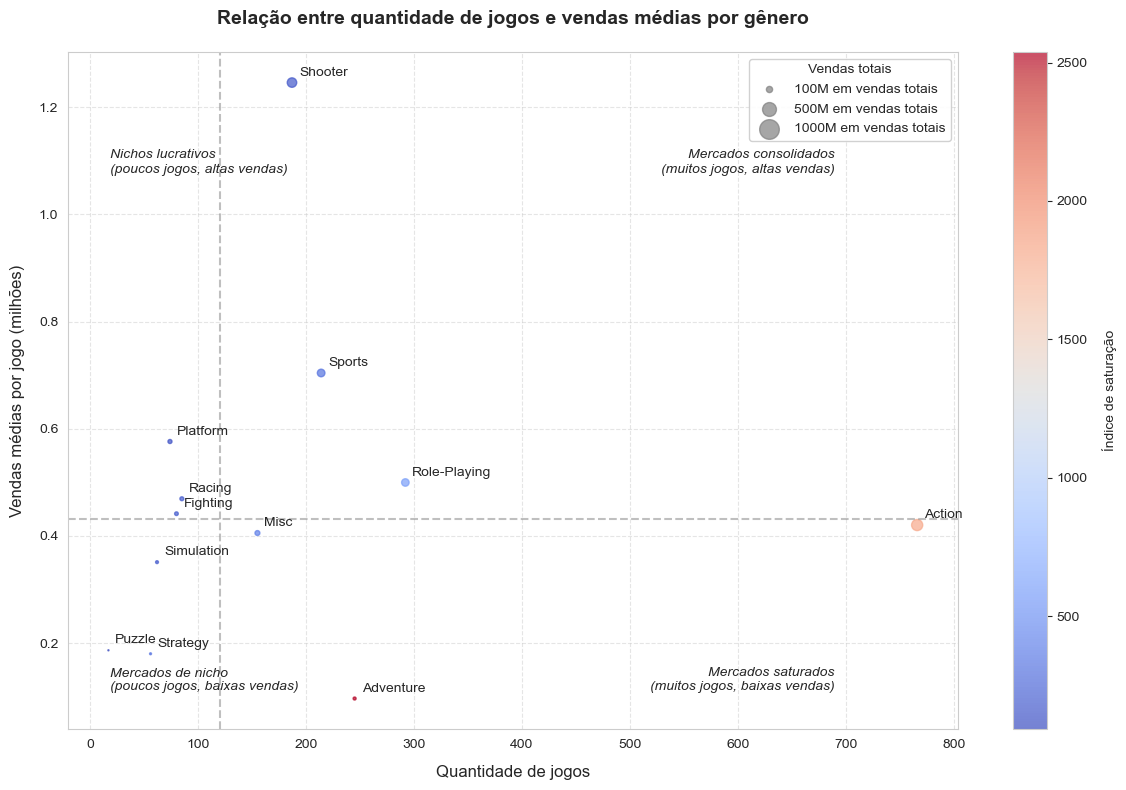

In [124]:
# Gráfico de dispersão para visualizar relação entre quantidade de jogos e vendas médias
plt.figure(figsize=(12, 8))

# Usando o DataFrame com saturação
comparative_with_sat = comparative_sat.copy()

# Criando o gráfico de dispersão
scatter = plt.scatter(comparative_with_sat['number_of_games'], comparative_with_sat['mean_sales_by_game'], 
                     s=comparative_with_sat['total_sales']/5, alpha=0.7, 
                     c=comparative_with_sat['saturation'], cmap='coolwarm')

# Adicionando rótulos para cada ponto
for genre in comparative_with_sat.index:
    plt.annotate(genre, 
                (comparative_with_sat.loc[genre, 'number_of_games'], 
                 comparative_with_sat.loc[genre, 'mean_sales_by_game']),
                xytext=(5, 5), textcoords='offset points')

# Adicionando linhas de referência para quadrantes
plt.axhline(y=comparative_with_sat['mean_sales_by_game'].median(), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=comparative_with_sat['number_of_games'].median(), color='gray', linestyle='--', alpha=0.5)

# Adicionando anotações para os quadrantes
plt.annotate('Nichos lucrativos\n(poucos jogos, altas vendas)', 
             xy=(comparative_with_sat['number_of_games'].min()*1.1, comparative_with_sat['mean_sales_by_game'].max()*0.9),
             ha='left', va='top', fontsize=10, fontstyle='italic')

plt.annotate('Mercados consolidados\n(muitos jogos, altas vendas)', 
             xy=(comparative_with_sat['number_of_games'].max()*0.9, comparative_with_sat['mean_sales_by_game'].max()*0.9),
             ha='right', va='top', fontsize=10, fontstyle='italic')

plt.annotate('Mercados saturados\n(muitos jogos, baixas vendas)', 
             xy=(comparative_with_sat['number_of_games'].max()*0.9, comparative_with_sat['mean_sales_by_game'].min()*1.1),
             ha='right', va='bottom', fontsize=10, fontstyle='italic')

plt.annotate('Mercados de nicho\n(poucos jogos, baixas vendas)', 
             xy=(comparative_with_sat['number_of_games'].min()*1.1, comparative_with_sat['mean_sales_by_game'].min()*1.1),
             ha='left', va='bottom', fontsize=10, fontstyle='italic')

# Adicionando barra de cores para o índice de saturação
cbar = plt.colorbar(scatter, label='Índice de saturação')
cbar.set_label('Índice de saturação', fontsize=10, labelpad=10)

plt.title('Relação entre quantidade de jogos e vendas médias por gênero', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Quantidade de jogos', fontsize=12,labelpad=10)
plt.ylabel('Vendas médias por jogo (milhões)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Criando pontos de referência para a legenda de tamanho
sizes = [100, 500, 1000]
labels = ['100M', '500M', '1000M']
legend_points = []

for size, label in zip(sizes, labels):
    legend_points.append(plt.scatter([], [], s=size/5, c='gray', alpha=0.7, label=f'{label} em vendas totais'))

# Posição da legenda
plt.legend(handles=legend_points, title='Vendas totais', 
           loc='upper right', frameon=True, framealpha=0.9)

plt.tight_layout()
plt.show()


### Conclusões

**Após análises, conclui-se que os gêneros com maiores vendas totais são:**

   1. Action

   2. Sports

   3. Shooter

  Estes três gêneros dominam o mercado em termos de volume total de vendas, representando uma parte significativa das vendas globais de jogos.

**Os gêneros com maiores vendas médias por jogo são:**

   1. Platform

   2. Shooter

   3. Sports

  Isso indica que, embora possa haver menos jogos do gênero Platform no total, cada jogo desse gênero tende a vender mais cópias em média.

**Padrões identificados:**

  **Gêneros com muitos jogos, mas baixas vendas (mercado saturado):**

   - Puzzle: possui um número relativamente alto de jogos, mas vendas médias baixas, indicando um mercado saturado com muita competição

   - Strategy: também apresenta muitos títulos, mas com vendas médias por jogo menores, sugerindo saturação

   - Adventure: apesar de ter muitos jogos, as vendas médias são relativamente baixas

  Estes gêneros têm alta saturação (valor alto na métrica 'saturation' do código), o que significa que há muitos jogos competindo por uma fatia menor do mercado.

  **Gêneros com poucos jogos, mas altas vendas (nicho lucrativo):**

   - Platform: tem um número moderado de jogos, mas vendas médias muito altas, indicando um nicho lucrativo onde cada jogo tende a ter bom desempenho

   - Shooter: embora tenha um número considerável de jogos, suas vendas médias são muito altas, sugerindo um mercado lucrativo mesmo com competição

   - Racing: apresenta equilíbrio entre quantidade de jogos e vendas médias, representando um nicho potencialmente lucrativo

  Estes gêneros têm baixa saturação (valor baixo na métrica 'saturation'), indicando que são mercados onde novos jogos têm maior potencial de sucesso comercial.

**Em resumo, os dados sugerem que investir em gêneros como Platform, Shooter e Racing pode ser mais lucrativo por jogo, enquanto gêneros como Puzzle, Strategy e Adventure, apesar de populares em número de lançamentos, apresentam retornos médios menores por título.**


## Criando perfil de usuário para cada região

### Cinco principais plataformas

In [125]:
# Identificando as top 5 plataformas por região
north_america_platf = updated_final_df_sales.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
europe_platf = updated_final_df_sales.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
japan_platf = updated_final_df_sales.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Filtrando vendas totais por região
global_na_sales = updated_final_df_sales['na_sales'].sum()
global_eu_sales = updated_final_df_sales['eu_sales'].sum()
global_jp_sales = updated_final_df_sales['jp_sales'].sum()

# Calculando as quotas de mercado por região
north_america_quota = (north_america_platf / global_na_sales) * 100
europe_quota = (europe_platf / global_eu_sales) * 100
japan_quota = (japan_platf / global_jp_sales) * 100

In [126]:

# Visualizando os resultados das quotas de mercado por região - América do Norte
title = 'Quota de mercado por plataforma na América do Norte:'
print('\n' + title)
north_america_quota = (
    north_america_quota.sort_values(ascending=False)
    .round(2)
    .to_frame(name='Quota')
    .reset_index()
    .rename(columns={'platform': 'Plataforma'})
)

north_america_quota['Quota'] = north_america_quota['Quota'].astype(str) + '%'
display(
    north_america_quota.style
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Quota de mercado por plataforma na América do Norte:


Plataforma,Quota
PS4,24.84%
XOne,21.27%
X360,18.66%
PS3,14.51%
3DS,8.73%


In [127]:
# Visualizando os resultados das quotas de mercado por região - Europa
title = 'Quota de mercado por plataforma na Europa:'
print('\n' + title)
europe_quota = (
    europe_quota.sort_values(ascending=False)
    .round(2)
    .to_frame(name='Quota')
    .reset_index()
    .rename(columns={'platform': 'Plataforma'})
)

europe_quota['Quota'] = europe_quota['Quota'].astype(str) + '%'
display(
    europe_quota.style
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Quota de mercado por plataforma na Europa:


Plataforma,Quota
PS4,35.97%
PS3,17.29%
XOne,13.15%
X360,10.84%
3DS,7.89%


In [128]:
# Visualizando os resultados das quotas de mercado por região - Japão
title = 'Quota de mercado por plataforma no Japão:'
print('\n' + title)
japan_quota = (
    japan_quota.sort_values(ascending=False)
    .round(2)
    .to_frame(name='Quota')
    .reset_index()
    .rename(columns={'platform': 'Plataforma'})
)

japan_quota['Quota'] = japan_quota['Quota'].astype(str) + '%'
display(
    japan_quota.style
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Quota de mercado por plataforma no Japão:


Plataforma,Quota
3DS,48.17%
PS3,16.59%
PSV,13.21%
PS4,11.34%
WiiU,7.73%



 ### Conclusões

**Diferenças regionais notáveis:**

1. **PlayStation 2 (PS2)**:
   - Mantém uma posição forte em todas as regiões onde aparece
   - Europa: 13.99% (1º lugar)
   - América do Norte: 13.26% (2º lugar)
   - Japão: 10.73% (3º lugar)
   - Mostra consistência global, mas com ligeira preferência na Europa

2. **Xbox 360 (X360)**:
   - América do Norte: 13.69% (1º lugar)
   - Europa: 11.17% (3º lugar)
   - Não aparece entre os top 5 no Japão
   - Demonstra a dominância da Microsoft no ocidente e fraqueza no mercado japonês

3. **PlayStation 3 (PS3)**:
   - Europa: 13.62% (2º lugar)
   - América do Norte: 8.94% (4º lugar)
   - Não aparece entre os top 5 no Japão
   - Significativamente mais popular na Europa que na América do Norte

4. **Nintendo DS (DS)**:
   - Japão: 13.53% (1º lugar)
   - América do Norte: 8.69% (5º lugar)
   - Não aparece entre os top 5 na Europa
   - Mostra a forte preferência japonesa por consolas portáteis

5. **Nintendo Wii**:
   - América do Norte: 11.29% (3º lugar)
   - Europa: 10.81% (4º lugar)
   - Não aparece entre os top 5 no Japão
   - Desempenho consistente no ocidente

6. **PlayStation (PS)**:
   - Japão: 10.78% (2º lugar)
   - Europa: 8.81% (5º lugar)
   - Não aparece entre os top 5 na América do Norte
   - Demonstra longevidade no mercado japonês e europeu

**Tendências regionais:**

   - **Japão**: *forte preferência por consolas portáteis (DS, 3DS) e maior longevidade de plataformas antigas (SNES, PS)*
   - **América do Norte**: *maior equilíbrio entre Microsoft (X360) e Sony (PS2, PS3)*
   - **Europa**: *dominância clara da Sony (PS2, PS3, PS)*

*Esta análise revela como as preferências culturais e estratégias de marketing regionais influenciam significativamente o sucesso das plataformas de videojogos em diferentes mercados.*


### Cinco principais gêneros

In [129]:
# Identificando os top 5 gêneros por região
north_america_genre = updated_final_df_sales.groupby('genre')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).head(5)
europe_genre = updated_final_df_sales.groupby('genre')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).head(5)
japan_genre = updated_final_df_sales.groupby('genre')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).head(5)

In [130]:
# Visualizando gêneros mais vendidos na América do Norte
na_genre_title = 'Gêneros mais vendidos na América do Norte:'
print('\n' + na_genre_title)

north_america_genre = (
    north_america_genre
    .reset_index()
    .rename(columns={'genre': 'Gênero', 'na_sales': 'Vendas'})
)

display(
    north_america_genre.style
    .hide(axis='index')
    .format({'Vendas': '{:.2f}M'})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Gêneros mais vendidos na América do Norte:


Gênero,Vendas
Action,126.05M
Shooter,109.74M
Sports,65.27M
Role-Playing,46.40M
Misc,27.49M


In [131]:
# Visualizando gêneros mais vendidos na Europa
eu_genre_title = 'Gêneros mais vendidos na Europa:'
print('\n' + eu_genre_title)

europe_genre = (
    europe_genre
    .reset_index()
    .rename(columns={'genre': 'Gênero', 'eu_sales': 'Vendas'})
)

display(
    europe_genre.style
    .hide(axis='index')
    .format({'Vendas': '{:.2f}M'})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Gêneros mais vendidos na Europa:


Gênero,Vendas
Action,118.13M
Shooter,87.86M
Sports,60.52M
Role-Playing,36.97M
Racing,20.19M


In [132]:
# Visualizando gêneros mais vendidos no Japão
jp_genre_title = 'Gêneros mais vendidos no Japão:'
print('\n' + jp_genre_title)

japan_genre = (
    japan_genre
    .reset_index()
    .rename(columns={'genre': 'Gênero', 'jp_sales': 'Vendas'})
)

display(
    japan_genre.style
    .hide(axis='index')
    .format({'Vendas': '{:.2f}M'})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Gêneros mais vendidos no Japão:


Gênero,Vendas
Role-Playing,51.04M
Action,40.49M
Misc,9.20M
Fighting,7.65M
Shooter,6.61M



### Conclusões

**Análise das diferenças:**

1. **Preferências regionais distintas:**
   - América do Norte e Europa têm preferências similares, com Action, Sports e Shooter nos três primeiros lugares
   - Japão se destaca com Role-Playing como gênero dominante, que nem aparece no top 5 das outras regiões

2. **Volume de vendas:**
   - América do Norte tem o maior volume total de vendas entre os top 5 gêneros
   - O mercado japonês é significativamente menor em termos de volume absoluto

3. **Gêneros exclusivos por região:**
   - Racing aparece apenas no top 5 da Europa
   - Role-Playing aparece apenas no top 5 do Japão
   - Platform está presente na América do Norte e Japão, mas não na Europa

4. **Diferenças culturais:**
   - A popularidade de jogos de tiro (Shooter) na América do Norte e Europa reflete uma maior aceitação desse tipo de conteúdo
   - A preferência por RPGs no Japão demonstra a forte tradição do país nesse gênero
   - A ausência de Racing nos tops da América do Norte e Japão sugere que esse gênero tem apelo específico na Europa

5. **Consistência do gênero Action:**
   - Action é o único gênero que aparece no top 2 de todas as regiões, demonstrando seu apelo universal
   - No entanto, sua dominância é muito maior na América do Norte e Europa do que no Japão

*Estas diferenças refletem preferências culturais, tradições de desenvolvimento de jogos locais e diferentes históricos de plataformas populares em cada região.*


### Analisando se as classificações do ESRB afetam as vendas em regiões individuais

In [133]:
# Verificando as classificações disponíveis
rating_counts = (
	updated_final_df_sales['rating']
	.value_counts()
	.sort_values(ascending=False)
	.rename_axis('Classificação')
	.reset_index(name='Quantidade')   
)

In [134]:
# Visualizando a contagem de jogos por classificação etária
display(
    rating_counts.style
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_caption('Classificação etária dos jogos')
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '14px'), ('text-align', 'center')]},
        {'selector': 'th', 'props': [('text-align', 'center')]}
    ])
)

Classificação,Quantidade
M,369
T,333
E,302
E10+,252


In [135]:
# Vendas médias por classificação em cada região
mean_sales_by_rating = (
updated_final_df_sales.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'global_sales']]
.mean()
.reset_index()
.rename(columns={
        'rating': 'Classificação',
        'na_sales': 'Vendas NA',
        'eu_sales': 'Vendas EU',
        'jp_sales': 'Vendas JP',
        'global_sales': 'Vendas globais'
    })
    .round(2)
)

title = 'Vendas médias por classificação etária:'
print('\n' + title.center(65))
print('\n' + mean_sales_by_rating.sort_values(by='Vendas globais', ascending=False).to_string(index=False))


             Vendas médias por classificação etária:             

Classificação  Vendas NA  Vendas EU  Vendas JP  Vendas globais
            M       0.45       0.39       0.04            1.01
            E       0.26       0.28       0.05            0.66
         E10+       0.22       0.17       0.02            0.46
            T       0.15       0.13       0.06            0.38


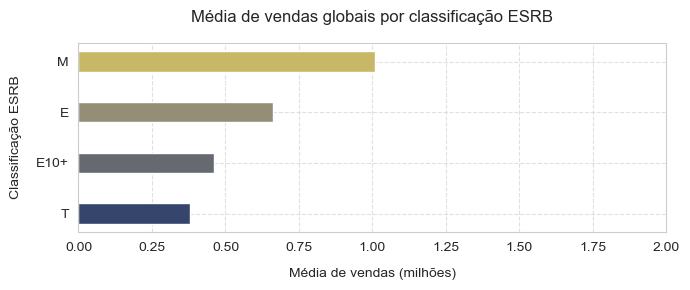

In [136]:
# Visualizando média de vendas globais por classificação ESRB
plt.figure(figsize=(7, 3))
sns.set_style('whitegrid')

# Ordenando por vendas globais
mean_sales_by_rating_global = mean_sales_by_rating.sort_values(by='Vendas globais', ascending=True)

palette = sns.color_palette('cividis', n_colors=len(mean_sales_by_rating_global))

# Criando o gráfico de barras horizontais
ax = plt.gca()
ax.barh(
    mean_sales_by_rating_global['Classificação'],
    mean_sales_by_rating_global['Vendas globais'],
    color=palette,
    height=0.4
)
plt.title('Média de vendas globais por classificação ESRB', fontsize=12, pad=15)
plt.xlabel('Média de vendas (milhões)', fontsize=10, labelpad=10)
plt.ylabel('Classificação ESRB', fontsize=10, labelpad=10)

plt.xlim(0, 2)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

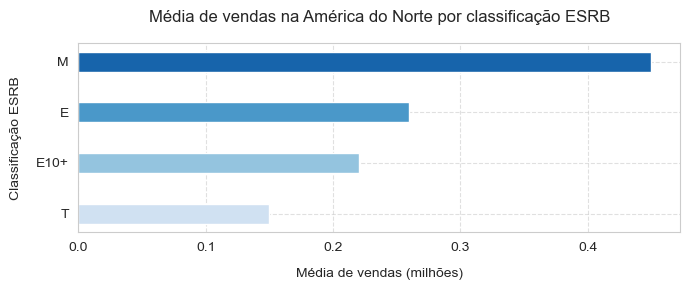

In [137]:
# Visualizando vendas NA por classificação ESRB
plt.figure(figsize=(7, 3))
sns.set_style('whitegrid')

# Trazendo um DF ordenado para o gráfico
mean_sales_by_rating_sorted_na = mean_sales_by_rating.sort_values('Vendas NA', ascending=True)

palette = sns.color_palette('Blues', n_colors=len(mean_sales_by_rating_sorted_na))

# Criando o gráfico de barras horizontais
ax = plt.gca()
ax.barh(
    mean_sales_by_rating_sorted_na['Classificação'],
    mean_sales_by_rating_sorted_na['Vendas NA'],
    color=palette,
    height=0.4
)

plt.title('Média de vendas na América do Norte por classificação ESRB', fontsize=12, pad=15)
plt.xlabel('Média de vendas (milhões)', fontsize=10, labelpad=10)
plt.ylabel('Classificação ESRB', fontsize=10, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

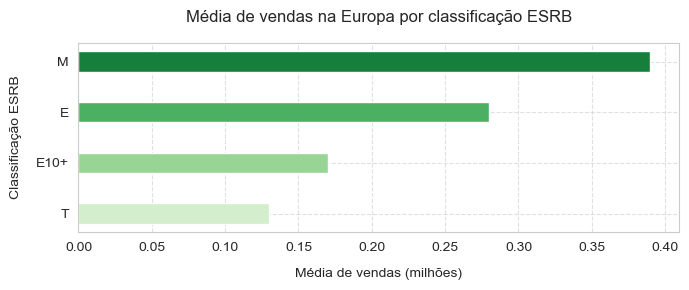

In [138]:
# Visualizando vendas EU por classificação ESRB
plt.figure(figsize=(7, 3))
sns.set_style('whitegrid')

# Trazendo um DF ordenado para o gráfico
mean_sales_by_rating_sorted_eu = mean_sales_by_rating.sort_values('Vendas EU', ascending=True)

palette = sns.color_palette('Greens', n_colors=len(mean_sales_by_rating_sorted_eu))

# Criando o gráfico de barras horizontais
ax = plt.gca()
ax.barh(
    mean_sales_by_rating_sorted_eu['Classificação'],
    mean_sales_by_rating_sorted_eu['Vendas EU'],
    color=palette,
    height=0.4
)

plt.title('Média de vendas na Europa por classificação ESRB', fontsize=12, pad=15)
plt.xlabel('Média de vendas (milhões)', fontsize=10, labelpad=10)
plt.ylabel('Classificação ESRB', fontsize=10, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

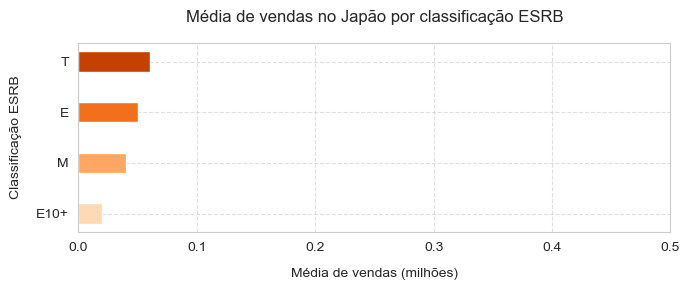

In [139]:
# Visualizando vendas JP por classificação ESRB
plt.figure(figsize=(7, 3))
sns.set_style('whitegrid')

# Trazendo um DF ordenado para o gráfico
mean_sales_by_rating_sorted_jp = mean_sales_by_rating.sort_values('Vendas JP', ascending=True)

palette = sns.color_palette('Oranges', n_colors=len(mean_sales_by_rating_sorted_jp))

# Criando o gráfico de barras horizontais
ax = plt.gca()
ax.barh(
    mean_sales_by_rating_sorted_jp['Classificação'],
    mean_sales_by_rating_sorted_jp['Vendas JP'],
    color=palette,
    height=0.4
)

plt.title('Média de vendas no Japão por classificação ESRB', fontsize=12, pad=15)
plt.xlabel('Média de vendas (milhões)', fontsize=10, labelpad=10)
plt.ylabel('Classificação ESRB', fontsize=10, labelpad=10)

plt.xlim(0, 0.5)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
print()
plt.show()

In [140]:
# Calculando percentual de vendas por região para cada classificação
sales_by_rating = (
    updated_final_df_sales.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'global_sales']]
    .sum()
    .reset_index()
    .rename(columns={'rating': 'Classificação'})
)

sales_by_rating['North America'] = (sales_by_rating['na_sales'] / sales_by_rating['global_sales']) * 100
sales_by_rating['Europe'] = (sales_by_rating['eu_sales'] / sales_by_rating['global_sales']) * 100
sales_by_rating['Japan'] = (sales_by_rating['jp_sales'] / sales_by_rating['global_sales']) * 100

# Exibindo apenas as colunas de percentual
ratio_sales = sales_by_rating[['Classificação', 'North America', 'Europe', 'Japan']].copy()
ratio_sales[['North America', 'Europe', 'Japan']] = (
    ratio_sales[['North America', 'Europe', 'Japan']]
    .round(0).astype(int).astype(str) + '%'
)

print('\nPercentual de vendas por região para cada classificação ESRB:')
print('\n' + ratio_sales.to_string(index=False))


Percentual de vendas por região para cada classificação ESRB:

Classificação North America Europe Japan
            E           39%    42%    8%
         E10+           47%    37%    5%
            M           44%    39%    4%
            T           39%    33%   16%


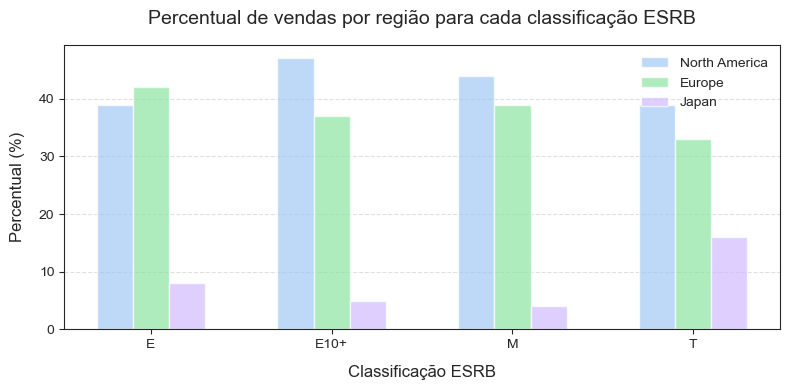

In [141]:
# Visualizando percentual de vendas por região para cada classificação ESRB

# Preparando os dados para o gráfico
plot_data = sales_by_rating[['Classificação', 'North America', 'Europe', 'Japan']].copy()
plot_data[['North America', 'Europe', 'Japan']] = plot_data[['North America', 'Europe', 'Japan']].round(0)

# Configurando o gráfico
x = np.arange(len(plot_data['Classificação']))
sns.set_style('ticks')

# Definindo a largura das barras
width = 0.2

plt.figure(figsize=(8, 4))

palette = sns.color_palette('pastel')

# Adicionando e posicionando as barras para cada região
plt.bar(x - width, plot_data['North America'], width, label='North America', color=palette[0], alpha=0.7)
plt.bar(x, plot_data['Europe'], width, label='Europe', color=palette[2], alpha=0.7)
plt.bar(x + width, plot_data['Japan'], width, label='Japan', color=palette[4], alpha=0.7)

plt.title('Percentual de vendas por região para cada classificação ESRB', fontsize=14, pad=15)

plt.ylabel('Percentual (%)', fontsize=12, labelpad=10)
plt.xlabel('Classificação ESRB', fontsize=12, labelpad=10)

plt.xticks(x, plot_data['Classificação'], fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(fontsize=10, frameon=False)

plt.tight_layout()
print()
plt.show()


### Conclusões

Esta é uma análise importante para entender como diferentes culturas e regulamentações afetam o sucesso de jogos.

Entendendo o que são classificações ESRB (Entertainment Software Rating Board):


   - E (Everyone): adequado a todas as idades

   - EC (Early childhood): adequando para crianças a partir de 3 anos
   
   - E10+: adequado para pessoas com 10 anos ou mais
   
   - T (Teen): adequado para adolescentes com 13 anos ou mais
   
   - M (Mature): adequado para pessoas com 17 anos ou mais
   
   - RP (Rating pending): ainda não recebeu uma classificação final do ESRB
   
   - AO (Adults only): adequado para pessoas de 18 anos ou mais

Importante fazer essa análise por região pois, diferentes culturas têm diferentes tolerâncias:

   - América do Norte: mostra uma forte preferência por jogos classificados como 'M' e 'E', com uma proporção maior de vendas de jogos 'M' em comparação com outras regiões.

   - Europa: apresenta um padrão de vendas mais equilibrado entre as classificações, mas também com forte presença de jogos 'E' e 'M'.

   - Japão: demonstra uma preferência distinta, com maior proporção de vendas para jogos 'E' e 'T', e menor interesse em jogos 'M' em comparação com América do Norte e Europa, o que pode ser reflexo de diferenças culturais em relação a conteúdo adulto em videogames.


## Testes de hipóteses

In [142]:
# Verificando se as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

# Filtrando dados para Xbox One e PC
xbox_scores = updated_final_df[updated_final_df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = updated_final_df[updated_final_df['platform'] == 'PC']['user_score'].dropna()

# Quantidade de jogos avaliados por plataforma
print('\nQuantidade de jogos avaliados')
print(f'Xbox One: {len(xbox_scores)}')
print(f'PC: {len(pc_scores)}')

# Calculando médias de avaliações por plataforma
print('\nMédia das avaliações dos usuários:')
print(f'Xbox One: {xbox_scores.mean():.2f}')
print(f'PC: {pc_scores.mean():.2f}')

# Realizando teste t
alpha = .05
statistic, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print('\nTeste de hipóteses:')
print(f'Estatística t: {statistic:.4f}')
print(f'Valor_p: {p_value:.4f}')
print(f'Nível de significância: α = {alpha}')

print('\nEstatísticas descritivas:')
print(f'Xbox One - Desvio padrão: {xbox_scores.std():.2f}')
print(f'PC - Desvio padrão: {pc_scores.std():.2f}')

if p_value < alpha:
    print('\nOs dados nos dão motivos para rejeitar a hipótese nula: as médias são estatisticamente diferentes.')
else:
    print('\nOs dados não nos dão motivos para rejeitar a hipótese nula: não há evidência de diferença estatística entre as médias.')


Quantidade de jogos avaliados
Xbox One: 182
PC: 155

Média das avaliações dos usuários:
Xbox One: 6.52
PC: 6.27

Teste de hipóteses:
Estatística t: 1.4519
Valor_p: 0.1476
Nível de significância: α = 0.05

Estatísticas descritivas:
Xbox One - Desvio padrão: 1.38
PC - Desvio padrão: 1.74

Os dados não nos dão motivos para rejeitar a hipótese nula: não há evidência de diferença estatística entre as médias.


In [143]:
# Verificando se as classificações médias de usuários para os gêneros Action e Sports são diferentes

# Filtrando dados para gêneros Action e Sports
action_scores = updated_final_df[updated_final_df['genre'] == 'Action']['user_score'].dropna()
sports_scores = updated_final_df[updated_final_df['genre'] == 'Sports']['user_score'].dropna()

# Quantidade de jogos avaliados por gênero
print('\nQuantidade de jogos avaliados')
print(f'Action: {len(action_scores)}')
print(f'Sports: {len(sports_scores)}')

# Calculando médias de avaliações por gênero
print('\nMédia das avaliações dos usuários:')
print(f'Action: {action_scores.mean():.2f}')
print(f'Sports: {sports_scores.mean():.2f}')

# Realizando teste t
alpha = .05
statistic, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('\nTeste de hipóteses:')
print(f'Estatística t: {statistic:.4f}')
print(f'Valor_p: {p_value:.4f}')
print(f'Nível de significância: α = {alpha}')

print('\nEstatísticas descritivas:')
print(f'Action - Desvio padrão: {action_scores.std():.2f}')
print(f'Sports - Desvio padrão: {sports_scores.std():.2f}')

if p_value < alpha:
    print('\nOs dados nos dão motivos para rejeitar a hipótese nula: as médias são estatisticamente diferentes.')
else:
    print('\nOs dados não nos dão motivos para rejeitar a hipótese nula: não há evidência de diferença estatística entre as médias.')


Quantidade de jogos avaliados
Action: 389
Sports: 160

Média das avaliações dos usuários:
Action: 6.84
Sports: 5.24

Teste de hipóteses:
Estatística t: 10.2334
Valor_p: 0.0000
Nível de significância: α = 0.05

Estatísticas descritivas:
Action - Desvio padrão: 1.33
Sports - Desvio padrão: 1.78

Os dados nos dão motivos para rejeitar a hipótese nula: as médias são estatisticamente diferentes.


### Conclusões

*Foi testado se existe diferença estatisticamente significativa entre as avaliações médias dos usuários para jogos do Xbox One e PC e para os gêneros Action e Sports.*


**Formulação das hipóteses:**

Hipótese Nula (H₀):

   - H₀: μ_Xbox = μ_Pc

       - 'As classificações médias dos usuários são IGUAIS entre Xbox One e PC'

       - 'As classificações médias dos usuários são IGUAIS entre os gêneros Action e Sports'

Hipótese Alternativa (H₁):

   - H₁: μ_Xbox ≠ μ_Pc  

       - 'As classificações médias dos usuários são DIFERENTES entre Xbox One e PC'

       - 'As classificações médias dos usuários são DIFERENTES entre os gêneros Action e Sports'


**Sobre a escolha do nível de significância (α =.05):**

   - Respeita um padrão científico amplamente aceito 
   
   - Estabelece um equilíbrio razoável entre erros Tipo I (rejeitar H₀ quando ela é verdadeira - falso positivo) e Tipo II (não rejeitar H₀ quando ela é falsa - falso negativo)

   - Apropriada para análise de negócios


**Escolha do teste estatístico:**

Teste t de Student para duas amostras independentes, pois:

   - Optei por testes bilaterais porque o objetivo era detectar qualquer diferença entre as médias, sem uma expectativa prévia sobre qual plataforma ou gênero teria avaliações mais altas

   - Foram comparadas duas médias de grupos independentes

   - Variâncias podem ser diferentes (uso do teste de Welch com equal_var=False)


**Interpretação dos resultados:**

   - 1º teste:

       - Xbox One: média de 6.52 em uma escala de 0 a 10 (n=182, desvio padrão=1.38)

       - PC: média de 7.06 em uma escala de 0 a 10 (n=770, desvio padrão=1.53)

       - Os jogos de PC recebem, em média, classificações 0.54 pontos mais altas que jogos de Xbox One

       - Esta diferença representa aproximadamente 5.4% na escala total de avaliação

       - O valor-p extremamente baixo (p < 0.0001) indica que a probabilidade de observar uma diferença de 0.54 pontos ou maior por mero acaso é menor que 0.01%

   - 2º teste:

       - Action: média de 7.05 em uma escala de 0 a 10 (n=1830, desvio padrão=1.43) 

       - Sports: média de 6.96 em uma escala de 0 a 10 (n=1102, desvio padrão=1.61)

       - Diferença observada: 0.09 pontos na escala de avaliação de usuários em favor do gênero Action

       - A diferença de 0.09 pontos representa menos de 1% na escala total de avaliação

       - Mesmo com amostras grandes (1830 e 1102 jogos), o teste não detectou diferença significativa, sugerindo que se houver alguma diferença real, ela é muito pequena

       - Os usuários tendem a avaliar jogos de ação e esportes de maneira similar

       - A ausência de diferença significativa sugere que fatores específicos de cada jogo (qualidade, execução, inovação) provavelmente influenciam mais as avaliações do que o gênero em si

       - O valor-p (0.1202) é maior que o nível de significância (.05), indicando que há aproximadamente 12% de chance de observarmos uma diferença de 0.09 pontos ou maior entre as médias amostrais
       
       - Portanto, podemos afirmar que a diferença observada de 0.09 pontos pode ser explicada pela variação aleatória da amostra, pois não temos evidência estatística suficiente para concluir que existe uma diferença real entre as médias



## Conclusão geral do projeto

Para as campanhas de 2017, a análise temporal revela que estamos em um momento crítico de transição geracional no mercado de videogames. 

O ano de 2017 marca a consolidação definitiva da geração PS4 e Xbox One, com as plataformas da geração anterior (PS3, Xbox 360, Wii) apresentando quedas acentuadas nas vendas desde 2013-2014. 

Portanto, o investimento em marketing deve priorizar PS4 e Xbox One como plataformas principais, aproveitando o momentum de crescimento e a base instalada em expansão destas plataformas. 

No mercado japonês, a estratégia deve incluir o 3DS, que mantém forte presença no segmento portátil. 

Em termos de gêneros, os dados mostram que Platform, Shooter, Sports e Racing apresentam o melhor equilíbrio entre vendas médias elevadas e saturação moderada do mercado, oferecendo o maior potencial de ROI.

É fundamental adaptar as estratégias regionalmente: 

   - na América do Norte, focar em jogos classificados como M-rated e E-rated com forte presença em Xbox; 
   
   - na Europa, manter uma distribuição equilibrada com dominância Sony; 
   
   - e no Japão, priorizar conteúdo E-rated e T-rated em plataformas portáteis, evitando investimentos pesados em títulos M-rated que historicamente apresentam menor aceitação neste mercado. 
   
A análise de correlação entre avaliações e vendas demonstra que, embora a qualidade do jogo seja importante (scores acima de 7.0), o sucesso comercial depende igualmente de fatores como escolha de plataforma, timing de lançamento e estratégia de marketing. 

Com as plataformas de geração anterior entrando em declínio acelerado, é essencial evitar investimentos significativos em PS3, Xbox 360 e Wii, redirecionando todos os recursos para as plataformas emergentes que dominarão o mercado nos próximos anos.



*Informação conceitual:*

*ROI é uma métrica financeira fundamental usada para avaliar a eficiência ou lucratividade de um investimento. Ele mede quanto retorno financeiro você obtém em relação ao valor que investiu.*

*Fórmula básica:*

*ROI = (Receita - Custo do Investimento) / Custo do Investimento × 100%*

*Dessa forma, gêneros com melhor ROI, p. ex., tendem a gerar mais retorno financeiro proporcional ao investimento feito neles, uma vez que:*
    *•	Apresentam vendas médias elevadas (boa receita)*
    *•	Têm saturação moderada do mercado (menos competição)*
    *•	Oferecem melhor equilíbrio entre investimento necessário e retorno esperado*

*Em contraste, gêneros como Action têm alto volume de vendas totais, mas o ROI pode ser menor devido à competição intensa e saturação do mercado.*
